# Description (from the provided Problem Statement)

## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

## Objective:

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

## Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing   Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers   to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account 
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent
 

## Best Practices for Notebook: 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish sequentially before submission.
It is preferable to remove all warnings and errors before submission.
 

## Submission Guidelines:

The submission should be: well commented Jupyter notebook [format - .HTML] - Please run the notebook sequentially before submitting.
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 1 files are submitted
Happy Learning!!

# Scoring guide (Rubric) - Credit card Users Churn Prediction

## Criteria

### Exploratory Data Analysis and Insights
- Problem definition, questions to be answered - Data background and contents - Univariate analysis - Bivariate analysis - Key meaningful observations on individual variables and the relationship between variables
### 5 Points

### Data pre-processing
- Prepare the data for analysis - Feature Engineering - Missing value Treatment - Outlier Treatment Note: Please ensure no data leakage occurs among train-test and validation sets
### 3 Points

### Model building
- Choose metric on interest - Build 6 models (from logistic regression, decision trees, bagging and boosting methods) Note: You can choose not to build XGBoost if you are facing issues with the installation
### 3 Points

### Model building - Oversampled data
- Build 6 models using oversampled data (from logistic regression, decision trees, bagging and boosting methods) - You can choose not to build XGBoost if you are facing issues with the installation
### 4 Points

### Model building - Undersampled data
- Build 6 models using undersampled data(from logistic regression, decision trees, bagging and boosting methods) - You can choose not to build XGBoost if you are facing issues with installation
### 4 Points

### Hyperparameter tuning using random search
- Choose models that might perform better after tuning (tune at least 3 models out of 18 built in the previous steps) - Provide proper reasoning for tuning that model - Tune the best 3 models obtained above using randomized search and metric of interest - Check the performance of 3 tuned models
### 7 Points

### Model Performances
- Compare the model performance of tuned models - Choose the best model
### 4 Points

### Productionize the model
- Create a final model using pipelines
### 3 Points

### Actionable Insights & Recommendations
- Business recommendations and insights
### 3 Points

### Notebook - Overall quality
- Structure and flow - Well commented code
### 4 Points

## Total Possible Points = 40

# 1. Loading Libraries and Importing Data

In [1]:
# magic line timer %%time

# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import (
    SimpleImputer,
    KNNImputer,
)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    r2_score,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# For over- and undersampling the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Incase I decide to play with these
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

<IPython.core.display.Javascript object>

In [2]:
# Standard import of a Comma Separated Values file
BC = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [3]:
# Making a copy to avoid corrupting the original data set
data = BC.copy()

<IPython.core.display.Javascript object>

# 2. Data Overview and Initial Observations

In [4]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10127 rows and 21 columns.


<IPython.core.display.Javascript object>

In [5]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [6]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

In [7]:
# I personally always like to look at a random sample.
data.sample(25, random_state=2)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
7862  711589758  Existing Customer            42      M                5   
3536  717886008  Existing Customer            63      M                1   
9770  720852108  Existing Customer            46      M                4   
8909  719785683  Existing Customer            41      M                4   
709   780054258  Existing Customer            40      M                5   
975   717180633  Existing Customer            59      M                1   
32    709029408  Existing Customer            41      M                4   
9454  708510858  Existing Customer            60      F                1   
4548  781297983  Existing Customer            58      M                2   
9351  789983133  Existing Customer            31      M                2   
7340  719414658  Existing Customer            52      F                0   
6257  717166383  Existing Customer            40      F                4   
8754  715037133  Existing Customer            40      M                3   
4577  709309308  Attrited Customer            50      M                3   
180   779562633  Existing Customer            45      M                2   
8252  715191258  Existing Customer            47      F                5   
9427  788671608  Existing Customer            45      F                4   
1578  719688408  Existing Customer            45      M                3   
9156  820666083  Attrited Customer            41      M                2   
4899  772655733  Existing Customer            41      M                1   
3438  713750583  Existing Customer            55      F                1   
9710  714586458  Existing Customer            41      F                1   
7150  712552608  Attrited Customer            46      F                3   
1097  711688158  Existing Customer            47      M                5   
8176  710780883  Existing Customer            48      F                5   

     Education_Level Marital_Status Income_Category Card_Category  \
7862     High School        Married     $60K - $80K          Blue   
3536     High School         Single  Less than $40K          Blue   
9770     High School       Divorced         $120K +          Blue   
8909   Post-Graduate        Married    $80K - $120K          Blue   
709         Graduate            NaN     $40K - $60K          Blue   
975    Post-Graduate        Married     $40K - $60K          Blue   
32          Graduate        Married     $60K - $80K          Blue   
9454      Uneducated         Single  Less than $40K          Blue   
4548             NaN       Divorced     $60K - $80K          Blue   
9351        Graduate            NaN    $80K - $120K        Silver   
7340        Graduate         Single             abc          Blue   
6257             NaN        Married     $40K - $60K          Blue   
8754       Doctorate            NaN  Less than $40K          Blue   
4577         College            NaN    $80K - $120K          Blue   
180       Uneducated        Married     $40K - $60K          Blue   
8252             NaN        Married             abc          Blue   
9427         College         Single     $40K - $60K          Gold   
1578        Graduate        Married    $80K - $120K        Silver   
9156        Graduate         Single         $120K +          Blue   
4899      Uneducated         Single    $80K - $120K          Blue   
3438         College            NaN  Less than $40K          Blue   
9710     High School       Divorced  Less than $40K          Blue   
7150        Graduate        Married  Less than $40K          Blue   
1097        Graduate         Single         $120K +          Blue   
8176      Uneducated         Single     $40K - $60K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
7862              32                         1                       2   
3536              51                         5                       3   
9770        

<IPython.core.display.Javascript object>

In [8]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

#### * There are some missing values in the Education_Level & Marital_Status columns, and six object datatype columns (Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category) that will be converted into dtype categorical.

In [9]:
# Checking for duplicated rows.
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

#### * There are no duplicated rows

In [10]:
# Verifying that there are no missing values
data.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Marital_Status               749
CLIENTNUM                      0
Contacts_Count_12_mon          0
Total_Ct_Chng_Q4_Q1            0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Attrition_Flag                 0
Months_on_book                 0
Card_Category                  0
Income_Category                0
Dependent_count                0
Gender                         0
Customer_Age                   0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

#### * There are quite a few NaN values in the Educational_Level (1519) and Marital_Status (749) that will have to be dealt with.

In [11]:
# Checking the number of unique data points in each column
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

<IPython.core.display.Javascript object>

#### * The amount of unique values in the CLIENTNUM column show the column will not be useful for modeling, and will be dropped.
#### * There is a lot of variation in some of the columns which will need to be looked at more in depth.

In [12]:
# Summary of columns.
cat_cols = [
    "CLIENTNUM",
    "Attrition_Flag",
    "Customer_Age",
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 80)

709920258    1
717171408    1
709372608    1
796336833    1
721433283    1
            ..
720250158    1
709831983    1
720917808    1
719207733    1
708085458    1
Name: CLIENTNUM, Length: 10127, dtype: int64
--------------------------------------------------------------------------------
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------------------------------------
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
58    157
59    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
68      2
66      2
70      1
73      1
Name: Customer_Age, dtype: int64
----------------------------------------------------------

<IPython.core.display.Javascript object>

#### * Attrition_Flag will be the target variable.
#### * Education_Level is missing entries in the Unknown category and has a lot of NaN values. Possible data entry issue?
#### * The Income_Category column has some unknown meaning to one of the categories (abc) and will have to be cleaned up.

In [13]:
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

<IPython.core.display.Javascript object>

### Initial Observations
* Attrition_Flag will be the target variable.
* There are some missing values in the Education_Level & Marital_Status columns, and six object datatype columns (Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category) that will be converted into dtype categorical.
* There are no duplicated rows.
* There are quite a few NaN values in the Educational_Level (1519) and Marital_Status (749) that will have to be dealt with as to not suffer data leakage.
* Education_Level is missing entries in the Unknown category and has a lot of NaN values. I am treating this as a data entry error. 
* The amount of unique values in the CLIENTNUM column show the column will not be useful for modeling, and will be dropped.
* There is a lot of variation in some of the columns which will need to be looked at more in depth.
* The Income_Category column has some unknown meaning to one of the categories (abc) and will have to be cleaned up.
* Cutomers ages range from 26-73 with a mean of 46.3 and a median of 46.
* Customers have anywhere from 0-5 dependants with a mean of 2.3 and a median of 2.0.
* The months on book category shows customers have held a card for anywhere from 13-56 months with a mean of 35.9 and a median of 36.
* The total relationships with the bank range from 1-6 a the mean of 3.8 and a median of 4.0.
* The total amount of months inactive over the last year ranges from 0-6 with a mean of 2.3 and a median of 2.
* Customers have been contacted in the last 12 months between 0-6 times with a mean of 2.5 and a median of 2.
* The credit limit per customer ranges from 1438.3-34516 with a mean of 8631.9 and a median of 4549. Showing a majority of customers have lower credit limits but the high credit limits of some are skewing the data as 75% of customers have less then 10k available.
* The total revolving balance ranges from 0-2517 with a mean of 1162.8 and a median of 1276.
* The average amount open to buy (or credit available) ranges from 3-34516 with a mean of 7469.1 and a median of 3474. Again the higher credit holding customers are skewing the data.
* The total transaction amount change ratio between q4-q1 ranges from 0-3.39 with mean of 0.76 and a median of 0.736.
* The total transaction count change ratio between q4-q1 ranges from 0-3.71 with a mean of 0.71 and a median of 0.70.
* The total transaction amount in the last year ranges from 510-18484 with a mean of 4404 and a median of 3899. Again the higher limit card holders are skewing data.
* The total transaction count in the last year ranges from 10-139 with a mean of 64.9 and a median of 67.
* The average utilization ratio ranges from 0-0.999 with a mean of 0.275 and a median of 0.176. Translating this into percentages the range is 0-99% utilization with a mean of 27.5% and a median of 17.6% showing the customers who use their card more are skewing the data.

* The average Thera Bank customer is a 46 year old married woman with a college degree, makes less then 40k a year, and holds the Blue Card. They have been with the company for ~3 years, having 4 relationships with Thera Bank, have been contacted twice in the past year, and have only been inactive for 2 months in the last year. Their Blue card has an average line of credit 4549 dollars, which is utilized around 17-27%. They have used their card an average of 65 times spending around 4k.

# 3. Data Preprocessing

####  Dropping CLIENTNUM column

In [14]:
data.drop(columns=["CLIENTNUM"], inplace=True)

<IPython.core.display.Javascript object>

#### Changing the Attrition_Flag column to a numerical dtype

In [15]:
data["Attrition_Flag"] = data["Attrition_Flag"].replace("Existing Customer", 0)
data["Attrition_Flag"] = data["Attrition_Flag"].replace("Attrited Customer", 1)

<IPython.core.display.Javascript object>

####  Replacing the NaN values in the Education_Level (This seems to be a data entry issue. There was a specified Unknown in the list of categories used for the Education_Level, but there were no instances when looking at the data. There were also a large amount of NaN values, in the Education_Level, so I am interpreting this as a data entry mistake.)

In [16]:
data.Education_Level.fillna("Unknown", inplace=True)

<IPython.core.display.Javascript object>

####  Replacing the NaN values in the Martial_Status with Unknown. This keeps me from putting any bias into the data. This also prevents data leakage as I am not imputing, similar to what I did with Education_Level.

In [17]:
data.Marital_Status.fillna("Unknown", inplace=True)

<IPython.core.display.Javascript object>

####  Rechecking the data

In [18]:
data.sample(25, random_state=2)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
7862               0            42      M                5     High School   
3536               0            63      M                1     High School   
9770               0            46      M                4     High School   
8909               0            41      M                4   Post-Graduate   
709                0            40      M                5        Graduate   
975                0            59      M                1   Post-Graduate   
32                 0            41      M                4        Graduate   
9454               0            60      F                1      Uneducated   
4548               0            58      M                2         Unknown   
9351               0            31      M                2        Graduate   
7340               0            52      F                0        Graduate   
6257               0            40      F                4         Unknown   
8754               0            40      M                3       Doctorate   
4577               1            50      M                3         College   
180                0            45      M                2      Uneducated   
8252               0            47      F                5         Unknown   
9427               0            45      F                4         College   
1578               0            45      M                3        Graduate   
9156               1            41      M                2        Graduate   
4899               0            41      M                1      Uneducated   
3438               0            55      F                1         College   
9710               0            41      F                1     High School   
7150               1            46      F                3        Graduate   
1097               0            47      M                5        Graduate   
8176               0            48      F                5      Uneducated   

     Marital_Status Income_Category Card_Category  Months_on_book  \
7862        Married     $60K - $80K          Blue              32   
3536         Single  Less than $40K          Blue              51   
9770       Divorced         $120K +          Blue              31   
8909        Married    $80K - $120K          Blue              36   
709         Unknown     $40K - $60K          Blue              25   
975         Married     $40K - $60K          Blue              36   
32          Married     $60K - $80K          Blue              36   
9454         Single  Less than $40K          Blue              47   
4548       Divorced     $60K - $80K          Blue              52   
9351        Unknown    $80K - $120K        Silver              22   
7340         Single             abc          Blue              36   
6257        Married     $40K - $60K          Blue              30   
8754        Unknown  Less than $40K          Blue              36   
4577        Unknown    $80K - $120K          Blue              37   
180         Married     $40K - $60K          Blue              34   
8252        Married             abc          Blue              41   
9427         Single     $40K - $60K          Gold              30   
1578        Married    $80K - $120K        Silver              36   
9156         Single         $120K +          Blue              37   
4899         Single    $80K - $120K          Blue              31   
3438        Unknown  Less than $40K          Blue              36   
9710       Divorced  Less than $40K          Blue              36   
7150        Married  Less than $40K          Blue              34   
1097         Single         $120K +          Blue              27   
8176         Single     $40K - $60K          Blue              38   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
7862                         1                       2                      2   
3536                

<IPython.core.display.Javascript object>

#### Replacing the "abc" in the Income_Category with NaN to Impute after data split

In [19]:
data["Income_Category"] = data["Income_Category"].replace("abc", np.NaN)

<IPython.core.display.Javascript object>

#### Replacing the "M" and "F" in the Gender column with Male and Female

In [20]:
data["Gender"] = data["Gender"].replace("M", "Male")
data["Gender"] = data["Gender"].replace("F", "Female")

<IPython.core.display.Javascript object>

#### Rechecking the data

In [21]:
data.sample(25, random_state=2)

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
7862               0            42    Male                5     High School   
3536               0            63    Male                1     High School   
9770               0            46    Male                4     High School   
8909               0            41    Male                4   Post-Graduate   
709                0            40    Male                5        Graduate   
975                0            59    Male                1   Post-Graduate   
32                 0            41    Male                4        Graduate   
9454               0            60  Female                1      Uneducated   
4548               0            58    Male                2         Unknown   
9351               0            31    Male                2        Graduate   
7340               0            52  Female                0        Graduate   
6257               0            40  Female                4         Unknown   
8754               0            40    Male                3       Doctorate   
4577               1            50    Male                3         College   
180                0            45    Male                2      Uneducated   
8252               0            47  Female                5         Unknown   
9427               0            45  Female                4         College   
1578               0            45    Male                3        Graduate   
9156               1            41    Male                2        Graduate   
4899               0            41    Male                1      Uneducated   
3438               0            55  Female                1         College   
9710               0            41  Female                1     High School   
7150               1            46  Female                3        Graduate   
1097               0            47    Male                5        Graduate   
8176               0            48  Female                5      Uneducated   

     Marital_Status Income_Category Card_Category  Months_on_book  \
7862        Married     $60K - $80K          Blue              32   
3536         Single  Less than $40K          Blue              51   
9770       Divorced         $120K +          Blue              31   
8909        Married    $80K - $120K          Blue              36   
709         Unknown     $40K - $60K          Blue              25   
975         Married     $40K - $60K          Blue              36   
32          Married     $60K - $80K          Blue              36   
9454         Single  Less than $40K          Blue              47   
4548       Divorced     $60K - $80K          Blue              52   
9351        Unknown    $80K - $120K        Silver              22   
7340         Single             NaN          Blue              36   
6257        Married     $40K - $60K          Blue              30   
8754        Unknown  Less than $40K          Blue              36   
4577        Unknown    $80K - $120K          Blue              37   
180         Married     $40K - $60K          Blue              34   
8252        Married             NaN          Blue              41   
9427         Single     $40K - $60K          Gold              30   
1578        Married    $80K - $120K        Silver              36   
9156         Single         $120K +          Blue              37   
4899         Single    $80K - $120K          Blue              31   
3438        Unknown  Less than $40K          Blue              36   
9710       Divorced  Less than $40K          Blue              36   
7150        Married  Less than $40K          Blue              34   
1097         Single         $120K +          Blue              27   
8176         Single     $40K - $60K          Blue              38   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
7862                         1                       2                     

<IPython.core.display.Javascript object>

In [22]:
data.isnull().sum().sort_values(ascending=False)

Income_Category             1112
Attrition_Flag                 0
Contacts_Count_12_mon          0
Total_Ct_Chng_Q4_Q1            0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Months_Inactive_12_mon         0
Customer_Age                   0
Total_Relationship_Count       0
Months_on_book                 0
Card_Category                  0
Marital_Status                 0
Education_Level                0
Dependent_count                0
Gender                         0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

#### * Now there are only NaN values in the Incom_Category which will be imputed after EDA and data split.

#### Converting object columns into ordered categorical columns

In [23]:
# List categorical variables in correct order
gender = [
    "Female",
    "Male",
]
# Assign the above list to category ranking
gend = pd.api.types.CategoricalDtype(ordered=True, categories=gender)
# Apply this to the specific column in DataFrame
data["Gender"] = data["Gender"].astype(gend)

<IPython.core.display.Javascript object>

In [24]:
# List categorical variables in correct order
education = [
    "Uneducated",
    "High School",
    "College",
    "Graduate",
    "Post-Graduate",
    "Doctorate",
    "Unknown",
]
# Assign the above list to category ranking
edu = pd.api.types.CategoricalDtype(ordered=True, categories=education)
# Apply this to the specific column in DataFrame
data["Education_Level"] = data["Education_Level"].astype(edu)

<IPython.core.display.Javascript object>

In [25]:
# List categorical variables in correct order
marital = [
    "Single",
    "Married",
    "Divorced",
    "Unknown",
]
# Assign the above list to category ranking
mars = pd.api.types.CategoricalDtype(ordered=True, categories=marital)
# Apply this to the specific column in DataFrame
data["Marital_Status"] = data["Marital_Status"].astype(mars)

<IPython.core.display.Javascript object>

In [26]:
# List categorical variables in correct order
marital = [
    "Single",
    "Married",
    "Divorced",
    "Unknown",
]
# Assign the above list to category ranking
mars = pd.api.types.CategoricalDtype(ordered=True, categories=marital)
# Apply this to the specific column in DataFrame
data["Marital_Status"] = data["Marital_Status"].astype(mars)

<IPython.core.display.Javascript object>

In [27]:
# List categorical variables in correct order
income = [
    "Less than $40K",
    "$40K - $60K",
    "$60K - $80K",
    "$80K - $120K",
    "$120K +",
]
# Assign the above list to category ranking
inc = pd.api.types.CategoricalDtype(ordered=True, categories=income)
# Apply this to the specific column in DataFrame
data["Income_Category"] = data["Income_Category"].astype(inc)

<IPython.core.display.Javascript object>

In [28]:
# List categorical variables in correct order
cardcat = [
    "Blue",
    "Silver",
    "Gold",
    "Platinum",
]
# Assign the above list to category ranking
card = pd.api.types.CategoricalDtype(ordered=True, categories=cardcat)
# Apply this to the specific column in DataFrame
data["Card_Category"] = data["Card_Category"].astype(card)

<IPython.core.display.Javascript object>

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<IPython.core.display.Javascript object>

# 4. EDA

## Univariate Analysis - Numerical Columns

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="gray"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="navy"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

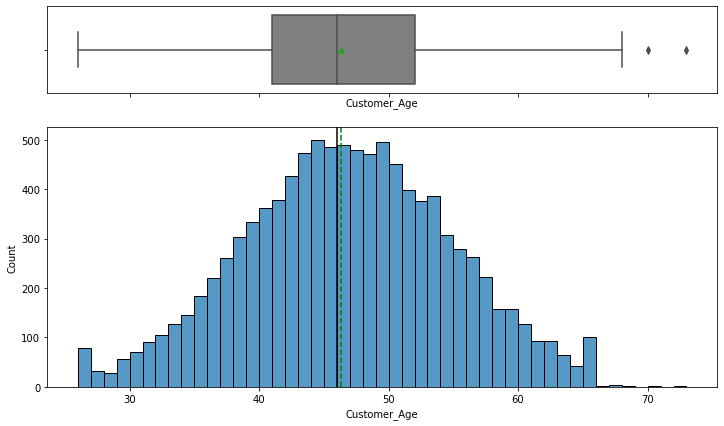

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data, "Customer_Age")

#### * The distrobution of ages seems fairly standard with a few higher numbers at the bottom of the curve. The few outliers seen are not out of an understandable range so they will nothing will be done.

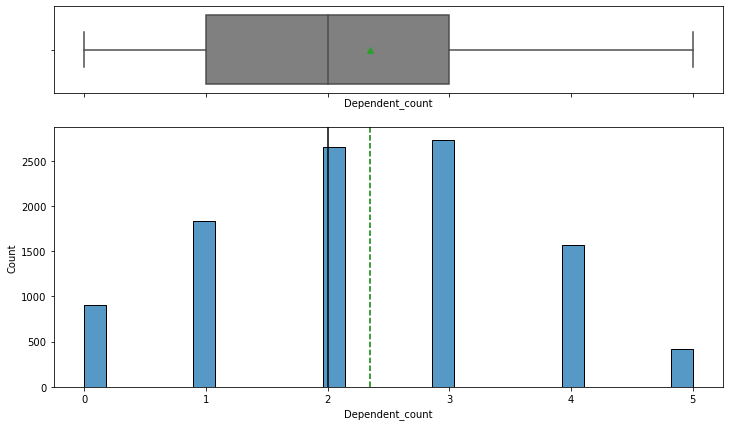

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(data, "Dependent_count")

#### * Expected distrobution, nothing to be done here. Seeing 0 dependents be higher then 5 is reasonable.

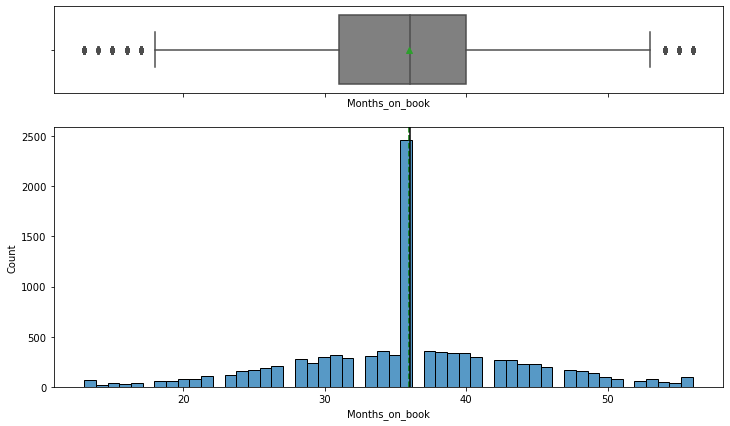

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "Months_on_book")

#### * There seem to be a rather large amount of customers who have been members who joined around 35-36 months ago. Perhaps there was some sort of card release (blue perhaps?) at this time or a marketing drive.

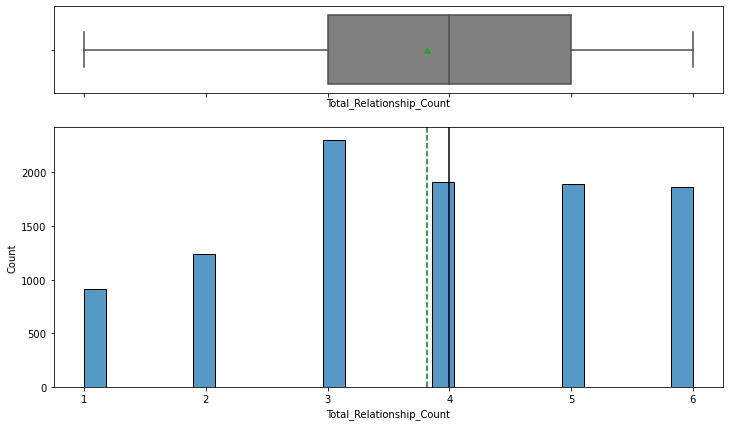

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(data, "Total_Relationship_Count")

#### * This data seems normal most people have at least a savings and checking account, plus whatever card they have through the bank.

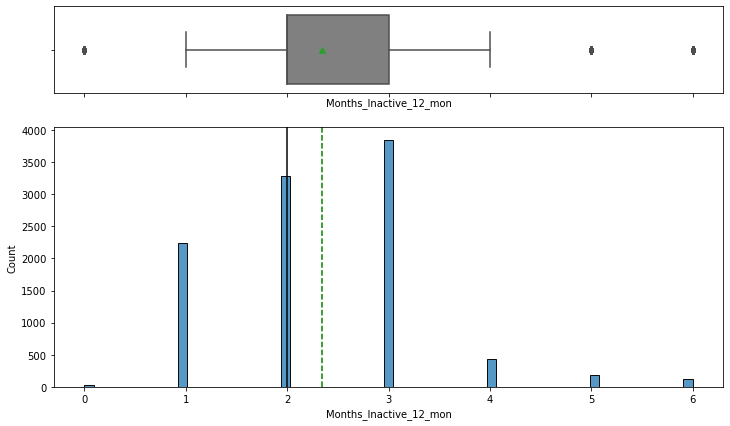

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(data, "Months_Inactive_12_mon")

#### * I will look closer at this data against the target variable in my bivariate/multivariate analysis.

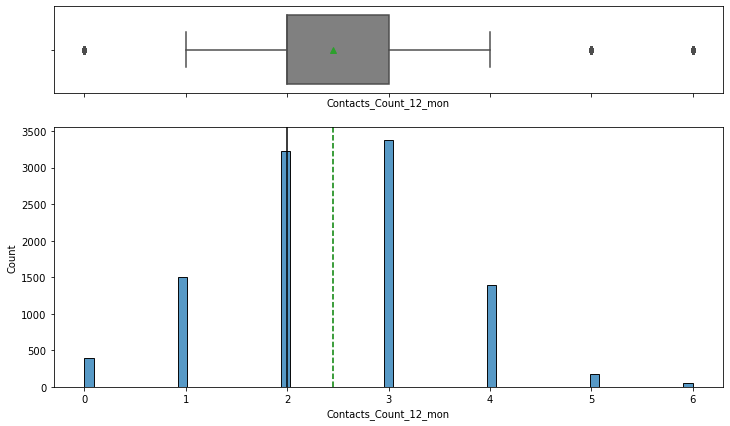

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(data, "Contacts_Count_12_mon")

#### * I am somwhat wary of the 0 outlier here but I don't get contacted by my back so I will keep it for now.

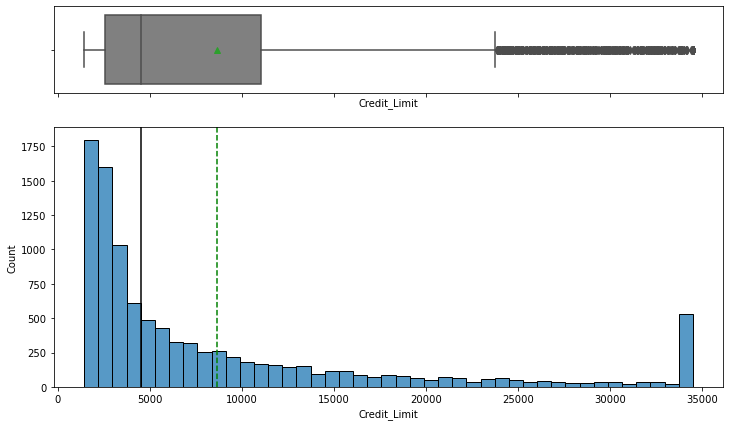

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(data, "Credit_Limit")

#### * This data toward the higher end seems odd I will take a closer look at it.

In [38]:
data[data["Credit_Limit"] > 33000].sample(20, random_state=2)

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
9531                0            48    Male                4        Graduate   
4494                0            48    Male                3     High School   
8813                0            50    Male                2        Graduate   
9471                1            40    Male                4      Uneducated   
9602                1            59    Male                0     High School   
2575                0            47    Male                1         Unknown   
9535                0            39    Male                1        Graduate   
6641                0            51    Male                0         College   
673                 0            55    Male                3     High School   
9885                0            44    Male                4      Uneducated   
10110               0            56    Male                1        Graduate   
2916                0            36    Male                1      Uneducated   
9473                1            55  Female                2         Unknown   
9295                0            27    Male                0         College   
8974                0            40    Male                3   Post-Graduate   
3876                0            48    Male                4   Post-Graduate   
3113                0            42    Male                2         Unknown   
10038               0            48    Male                4        Graduate   
9554                0            38    Male                2     High School   
1428                0            42    Male                4     High School   

      Marital_Status Income_Category Card_Category  Months_on_book  \
9531         Married    $80K - $120K          Blue              34   
4494         Married     $60K - $80K          Gold              37   
8813         Married    $80K - $120K        Silver              42   
9471          Single    $80K - $120K          Blue              36   
9602          Single    $80K - $120K          Gold              48   
2575        Divorced    $80K - $120K        Silver              38   
9535          Single     $60K - $80K          Gold              36   
6641         Married         $120K +        Silver              35   
673           Single         $120K +          Blue              51   
9885         Married    $80K - $120K        Silver              25   
10110         Single    $80K - $120K        Silver              49   
2916        Divorced    $80K - $120K          Blue              28   
9473          Single             NaN        Silver              37   
9295         Unknown    $80K - $120K        Silver              19   
8974          Single         $120K +          Blue              26   
3876          Single         $120K +          Blue              38   
3113          Single         $120K +          Gold              37   
10038        Unknown     $60K - $80K          Gold              32   
9554          Single    $80K - $120K          Blue              31   
1428          Single         $120K +          Blue              35   

       Total_Relationship_Count  Months_Inactive_12_mon  \
9531                          1                       1   
4494                          6                       2   
8813                          2                       3   
9471                          6                       3   
9602                          5                       2   
2575                          3                       2   
9535                          1                       3   
6641                          5                       1   
673                           3                       1   
9885                          3                       1   
10110                         5                       2   
2916                          4                       1   
9473                          2                       2   
9295                         

<IPython.core.display.Javascript object>

#### * The sample taken of customers with > 33000 in their Credit_Limit seem to all have the same credit limit, and be higher earning individuals. While the data is heavily skewed to the right, I don't want to introduce too much bias by getting rid of so many data points.

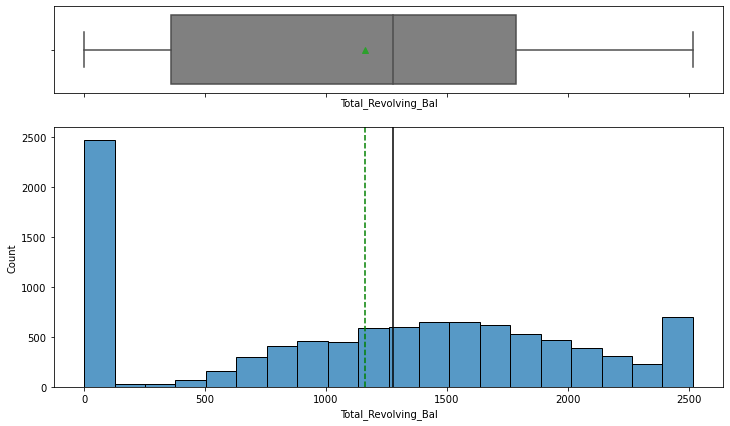

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(data, "Total_Revolving_Bal")

#### * Having a 0 revolving balance is good for the customer but not so good for the bank.

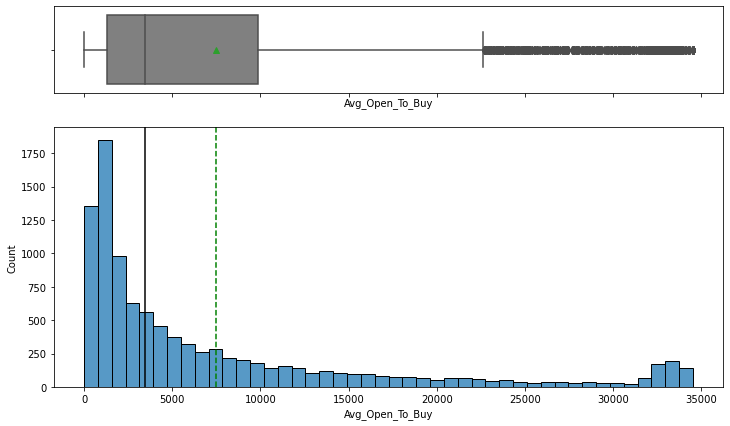

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(data, "Avg_Open_To_Buy")

#### * This matches the data seen with the average credit limit. If there is a high credit limit and low revolving balance that would lead to high amount left open to buy on the card.

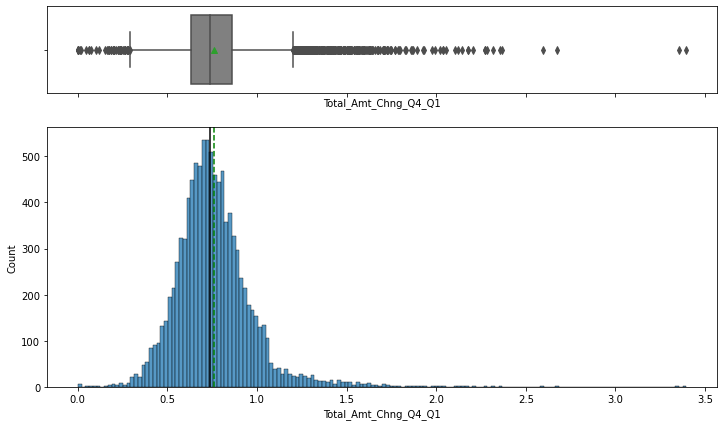

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

#### * There seem to be quite a few extreme outliers in this data. I will take a look.

In [42]:
data[data["Total_Amt_Chng_Q4_Q1"] > 2.0].sample(10, random_state=2)

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
431                0            47  Female                4         Unknown   
12                 0            56    Male                1         College   
1219               0            38  Female                4        Graduate   
2                  0            51    Male                3        Graduate   
177                0            67  Female                1        Graduate   
46                 0            56    Male                2       Doctorate   
8                  0            37    Male                3      Uneducated   
219                0            44  Female                3      Uneducated   
4                  0            40    Male                3      Uneducated   
1085               0            45  Female                3        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
431        Divorced     $40K - $60K          Blue              34   
12           Single    $80K - $120K          Blue              36   
1219        Married             NaN          Blue              28   
2           Married    $80K - $120K          Blue              36   
177         Married  Less than $40K          Blue              56   
46          Married     $60K - $80K          Blue              45   
8            Single     $60K - $80K          Blue              36   
219        Divorced  Less than $40K        Silver              38   
4           Married     $60K - $80K          Blue              21   
1085         Single             NaN          Blue              36   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
431                          6                       1                      2   
12                           3                       6                      0   
1219                         4                       1                      2   
2                            4                       1                      0   
177                          4                       3                      2   
46                           6                       2                      0   
8                            5                       2                      0   
219                          4                       1                      3   
4                            5                       1                      0   
1085                         3                       3                      4   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
431       3502.000                 1851         1651.000   
12       11751.000                    0        11751.000   
1219      6861.000                 1598         5263.000   
2         3418.000                    0         3418.000   
177       3006.000                 2517          489.000   
46        2283.000                 1430          853.000   
8        22352.000                 2517        19835.000   
219      11127.000                 1835         9292.000   
4         4716.000                    0         4716.000   
1085     11189.000                 2517         8672.000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
431                  2.023             1814              31   
12                   3.397             1539              17   
1219                 2.103             2228              39   
2                    2.594             1887              20   
177                  2.053             1661              32   
46                   2.316             1741              27   
8                    3.355             1350              24   
219                  2.368             1546              25   
4                    2.175              816              28   
1085                 2.041             2959              58   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
431                 0.722                  0.529  
12                  3.250  

<IPython.core.display.Javascript object>

In [43]:
data[data["Total_Amt_Chng_Q4_Q1"] > 2.0].count()

Attrition_Flag              20
Customer_Age                20
Gender                      20
Dependent_count             20
Education_Level             20
Marital_Status              20
Income_Category             16
Card_Category               20
Months_on_book              20
Total_Relationship_Count    20
Months_Inactive_12_mon      20
Contacts_Count_12_mon       20
Credit_Limit                20
Total_Revolving_Bal         20
Avg_Open_To_Buy             20
Total_Amt_Chng_Q4_Q1        20
Total_Trans_Amt             20
Total_Trans_Ct              20
Total_Ct_Chng_Q4_Q1         20
Avg_Utilization_Ratio       20
dtype: int64

<IPython.core.display.Javascript object>

In [44]:
data.drop(data[data["Total_Amt_Chng_Q4_Q1"] > 2].index, inplace=True)

<IPython.core.display.Javascript object>

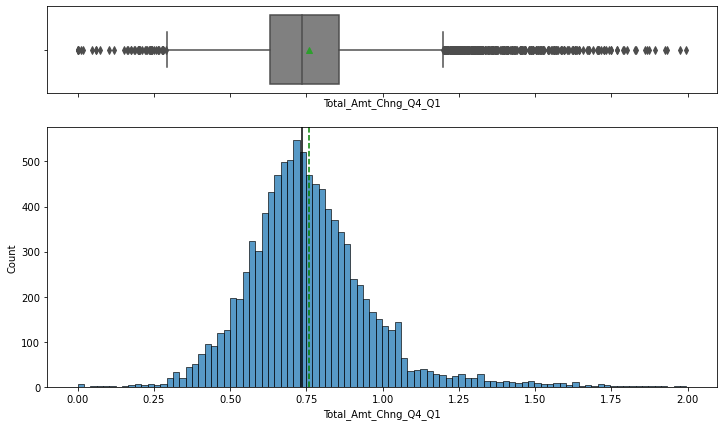

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

#### * I was able to cut out the most extreme outliers 

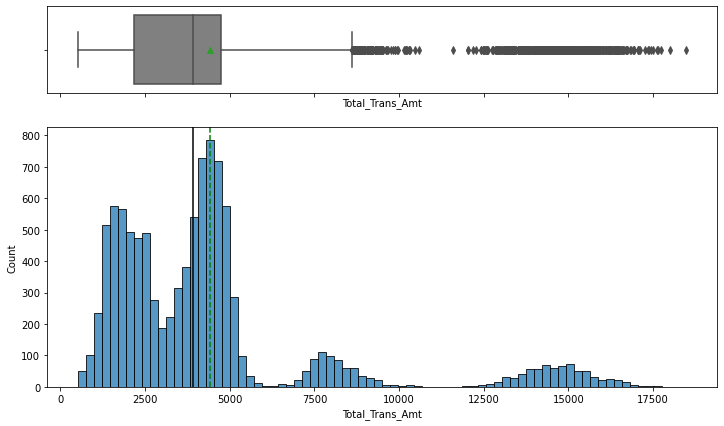

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(data, "Total_Trans_Amt")

#### * There are a lot of outliers but they seem to follow the trend started by the credit limit. 

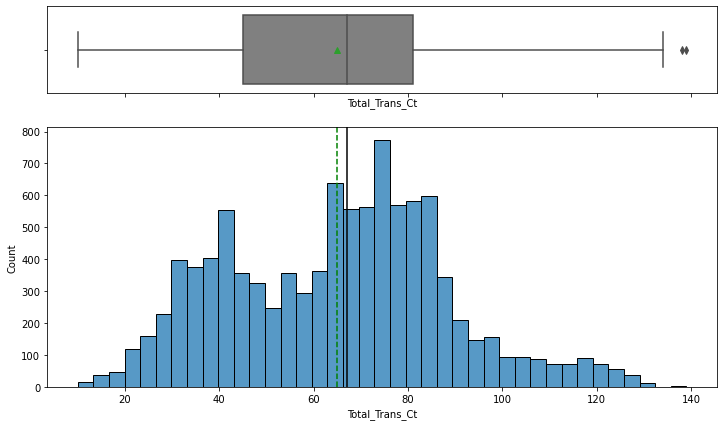

<IPython.core.display.Javascript object>

In [47]:
histogram_boxplot(data, "Total_Trans_Ct")

#### * Some skew to the data here but nothing glaring. outliers arent too extreme.

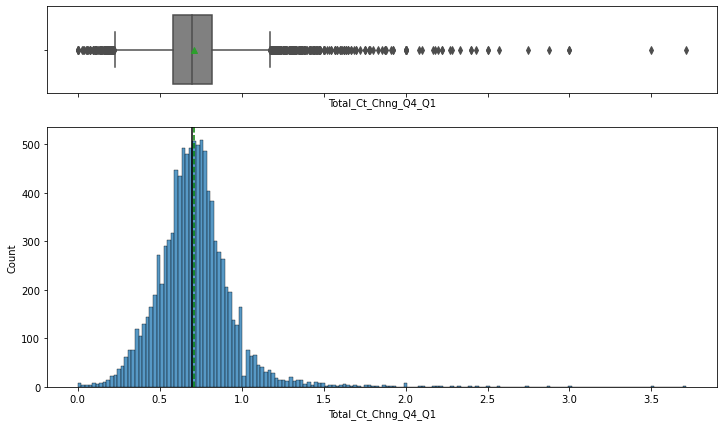

<IPython.core.display.Javascript object>

In [48]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

#### * Large amount of outliers in this column, I will take a closer look.

In [49]:
data[data["Total_Ct_Chng_Q4_Q1"] > 2.0].sample(10, random_state=2)

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
239                0            44    Male                4         Unknown   
1                  0            49  Female                5        Graduate   
280                0            43    Male                1        Graduate   
131                0            43    Male                4         Unknown   
805                0            29    Male                0   Post-Graduate   
1095               0            54  Female                3       Doctorate   
68                 0            49    Male                2        Graduate   
167                0            58  Female                4      Uneducated   
162                0            46    Male                1      Uneducated   
91                 0            49    Male                4     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
239          Single    $80K - $120K          Blue              34   
1            Single  Less than $40K          Blue              44   
280          Single    $80K - $120K        Silver              37   
131         Married     $40K - $60K          Blue              39   
805          Single     $40K - $60K          Blue              19   
1095        Married     $40K - $60K          Blue              39   
68          Married     $60K - $80K          Blue              32   
167         Married  Less than $40K          Blue              47   
162         Married     $60K - $80K          Blue              36   
91           Single    $80K - $120K          Blue              38   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
239                          4                       1                      2   
1                            6                       1                      2   
280                          4                       3                      2   
131                          5                       1                      2   
805                          4                       1                      2   
1095                         3                       1                      3   
68                           2                       2                      2   
167                          3                       3                      3   
162                          3                       2                      2   
91                           4                       3                      0   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
239      21573.000                 1585        19988.000   
1         8256.000                  864         7392.000   
280      34516.000                 1440        33076.000   
131       6111.000                 2517         3594.000   
805      13632.000                 1482        12150.000   
1095      2112.000                 1594          518.000   
68        1687.000                 1107          580.000   
167       2822.000                 2173          649.000   
162      20459.000                 2071        18388.000   
91       31302.000                 1953        29349.000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
239                  0.621             1384              36   
1                    1.541             1291              33   
280                  1.117             1575              34   
131                  0.632             1221              16   
805                  0.893             2168              42   
1095                 1.204             1338              29   
68                   1.715             1670              17   
167                  1.456             1218              23   
162                  1.248             1767              38   
91                   0.875             1564              35   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
239                 2.273                  0.073  
1                   3.714  

<IPython.core.display.Javascript object>

In [50]:
data[data["Total_Ct_Chng_Q4_Q1"] > 2.0].count()

Attrition_Flag              22
Customer_Age                22
Gender                      22
Dependent_count             22
Education_Level             22
Marital_Status              22
Income_Category             21
Card_Category               22
Months_on_book              22
Total_Relationship_Count    22
Months_Inactive_12_mon      22
Contacts_Count_12_mon       22
Credit_Limit                22
Total_Revolving_Bal         22
Avg_Open_To_Buy             22
Total_Amt_Chng_Q4_Q1        22
Total_Trans_Amt             22
Total_Trans_Ct              22
Total_Ct_Chng_Q4_Q1         22
Avg_Utilization_Ratio       22
dtype: int64

<IPython.core.display.Javascript object>

In [51]:
data.drop(data[data["Total_Ct_Chng_Q4_Q1"] > 2].index, inplace=True)

<IPython.core.display.Javascript object>

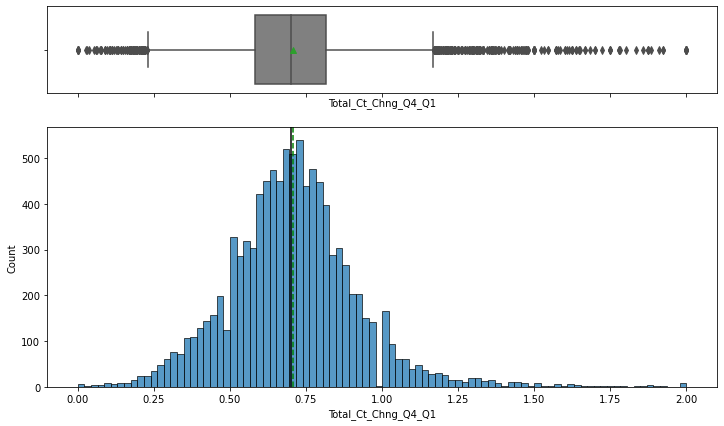

<IPython.core.display.Javascript object>

In [52]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

#### * I was able to remove the most extreme outliers.

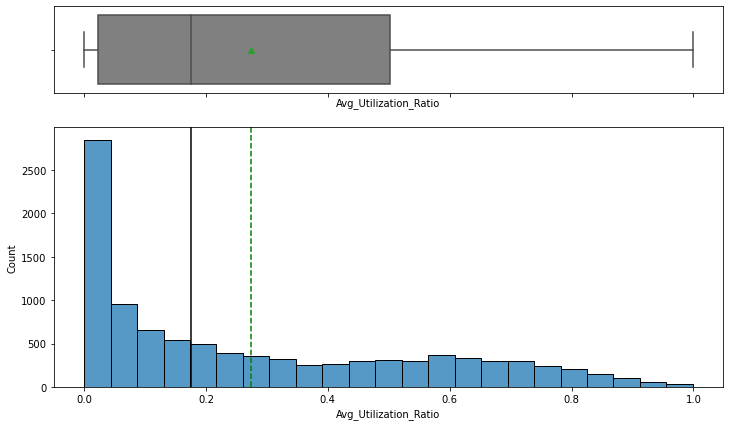

<IPython.core.display.Javascript object>

In [53]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

#### * Observations

## Univariate Analysis - Categorical Columns

In [54]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="bone",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

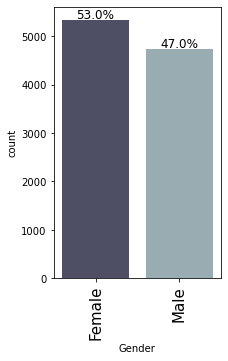

<IPython.core.display.Javascript object>

In [55]:
labeled_barplot(data, "Gender", perc=True)

#### * There are a higher number of Female customers with Credit Cards through Thera Bank.

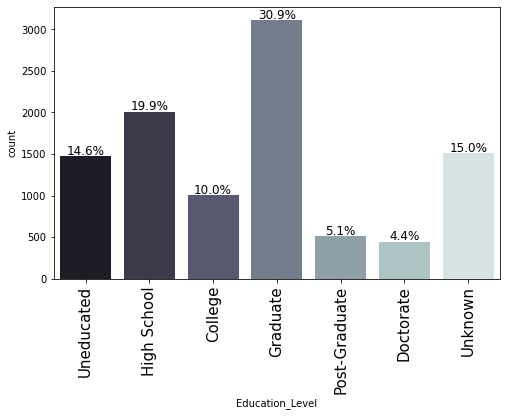

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(data, "Education_Level", perc=True)

#### * The highest percentage of cards were held by college graduates followed by high school graduates.

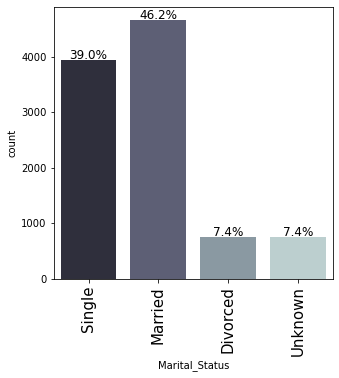

<IPython.core.display.Javascript object>

In [57]:
labeled_barplot(data, "Marital_Status", perc=True)

#### * The majority of cards were held by married customers.

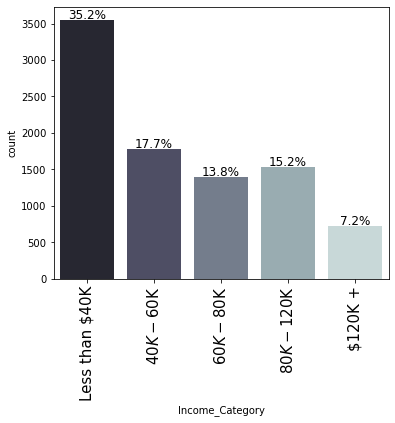

<IPython.core.display.Javascript object>

In [58]:
labeled_barplot(data, "Income_Category", perc=True)

#### * The majority of customers make less then $40k

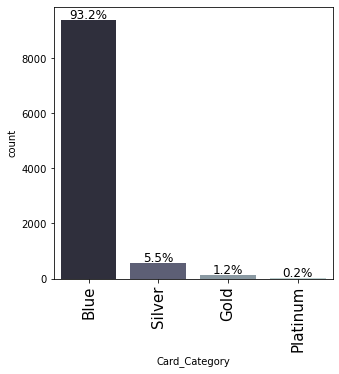

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(data, "Card_Category", perc=True)

#### * A vast majority of cards held are the Blue Card

## Bivariate Analysis

Wall time: 1min 1s


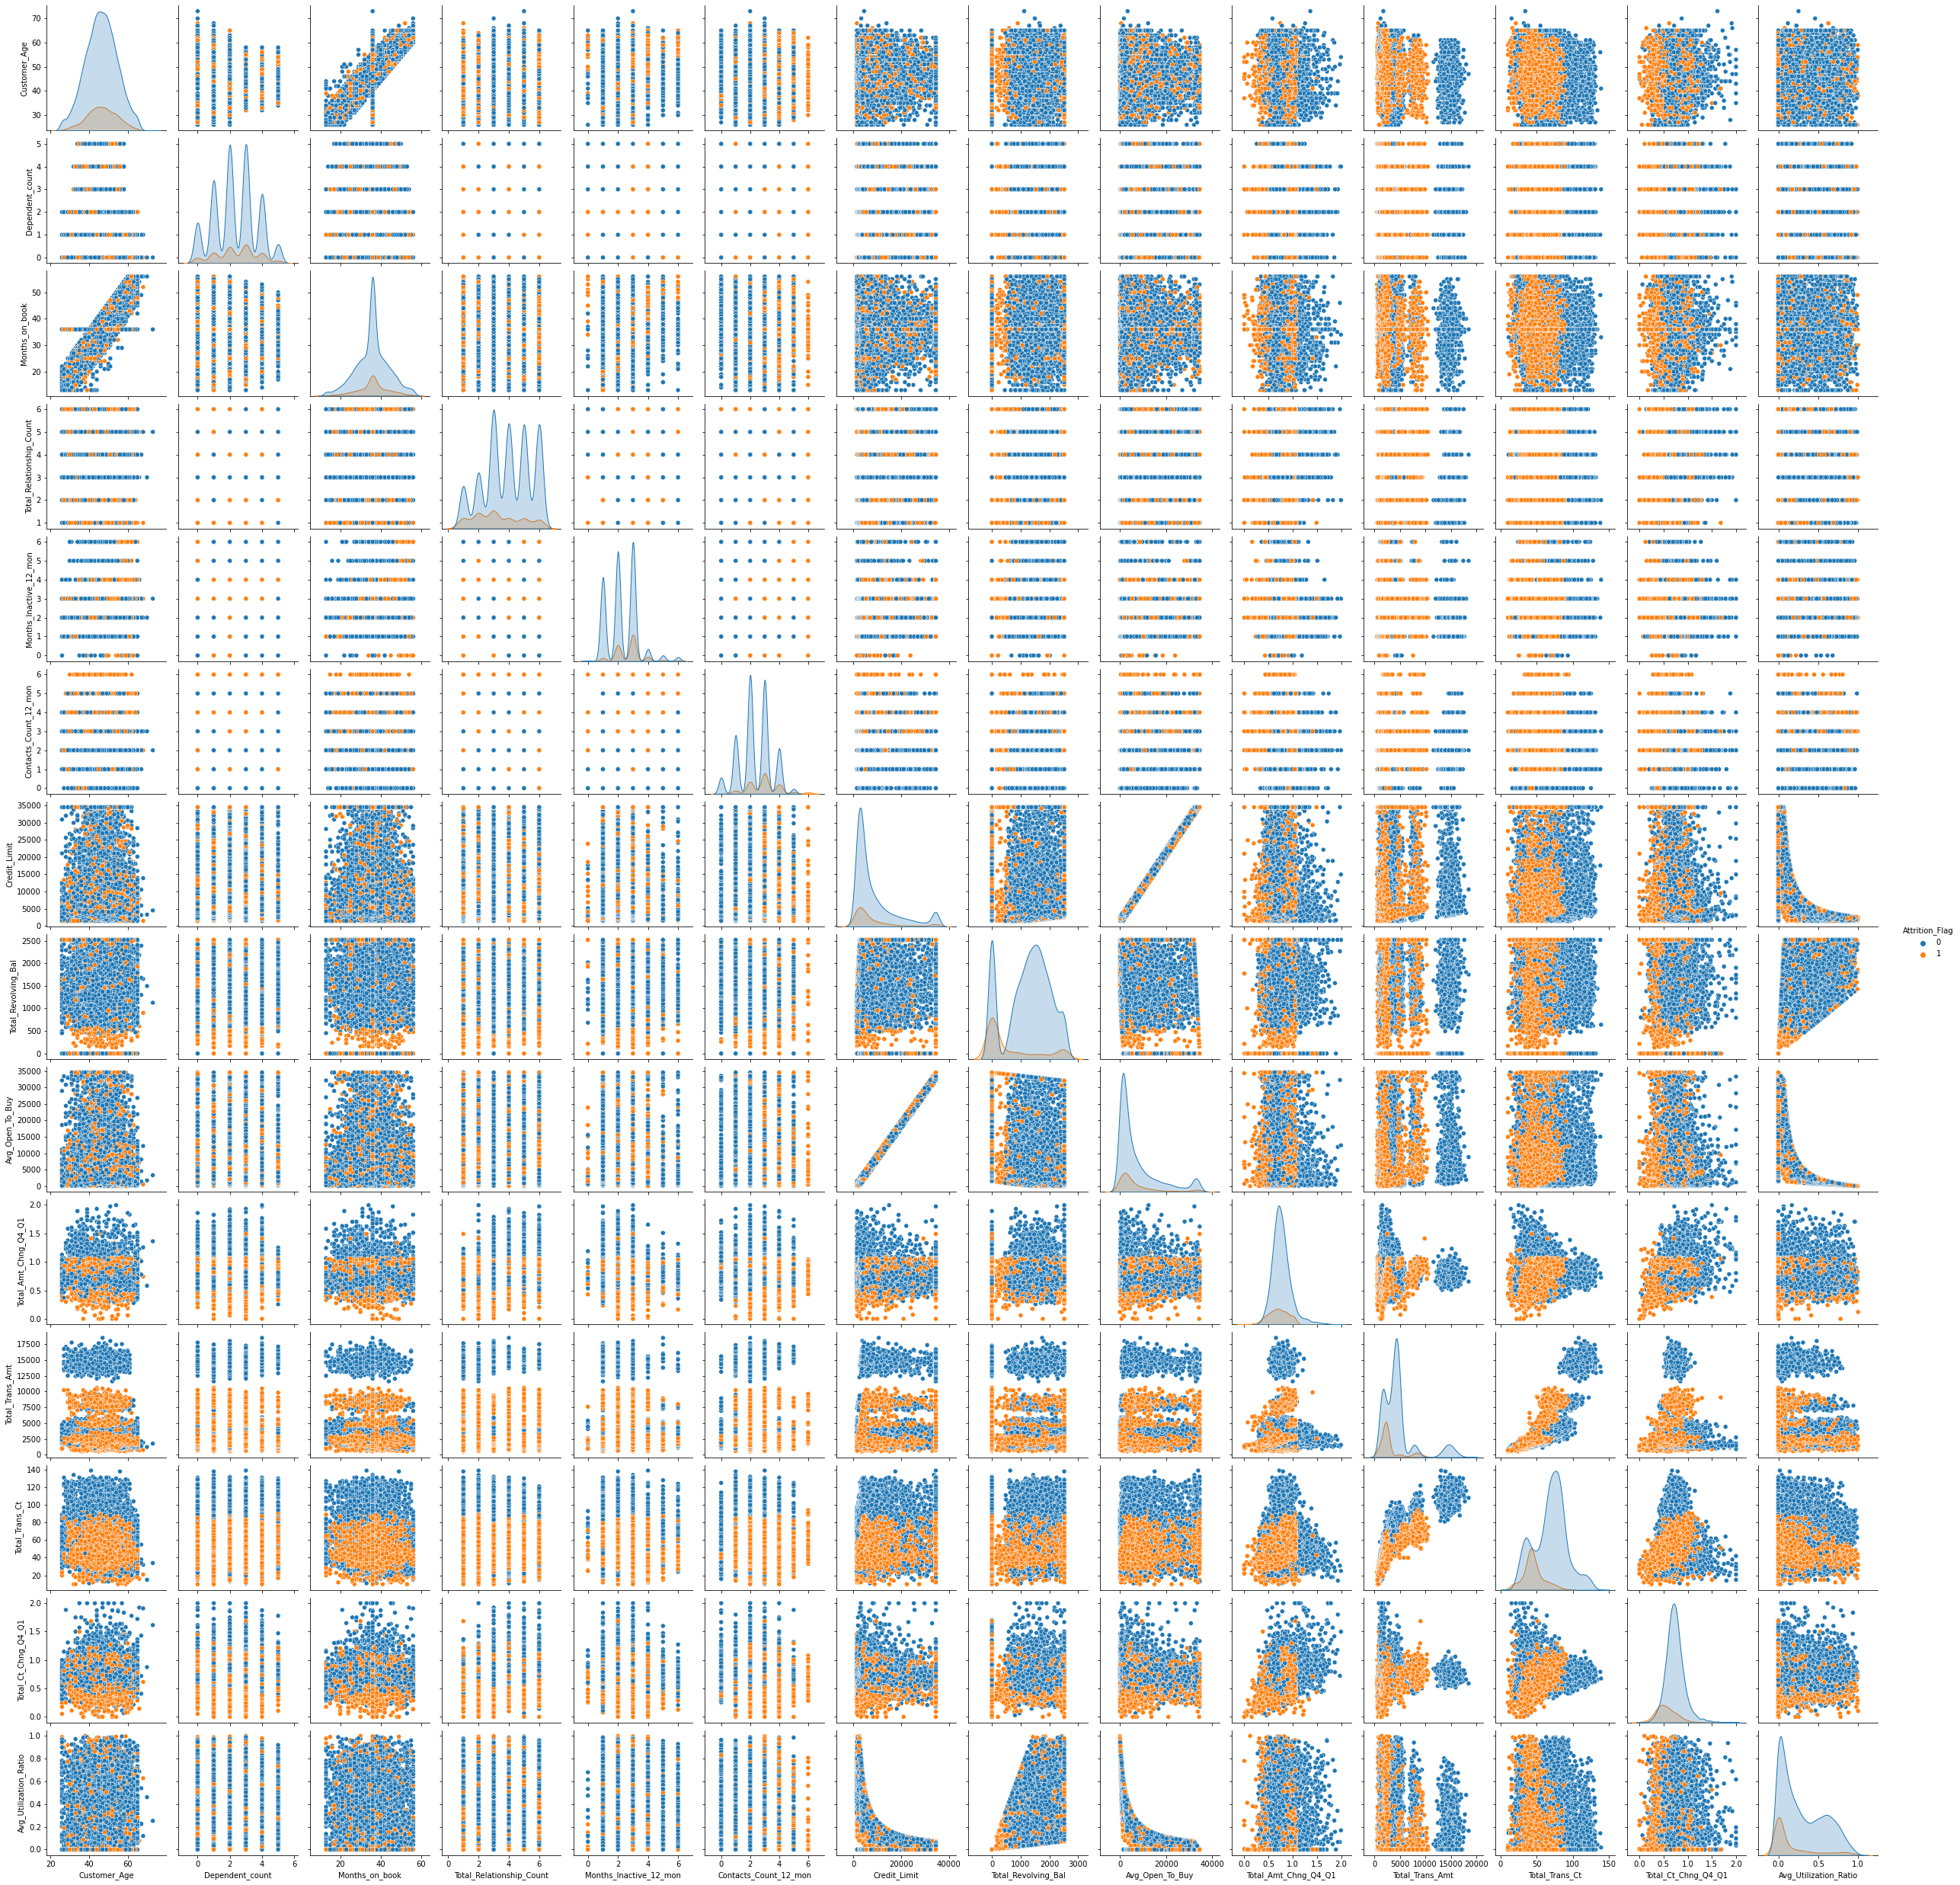

<IPython.core.display.Javascript object>

In [60]:
%%time
sns.pairplot(data, hue="Attrition_Flag")

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Trans_Amt'>

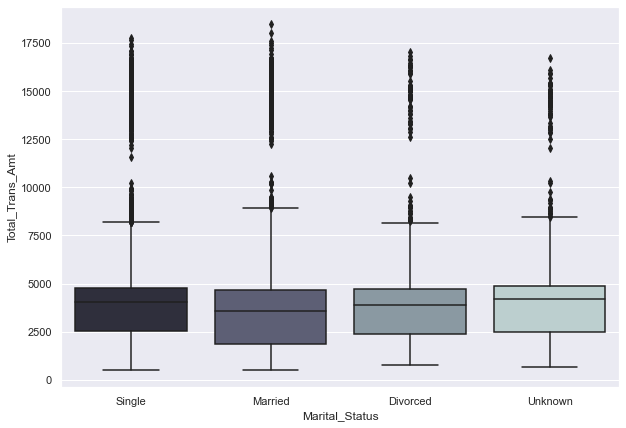

<IPython.core.display.Javascript object>

In [61]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Amt",
    x="Marital_Status",
    palette="bone",
    data=data,
    orient="vertical",
)

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Trans_Ct'>

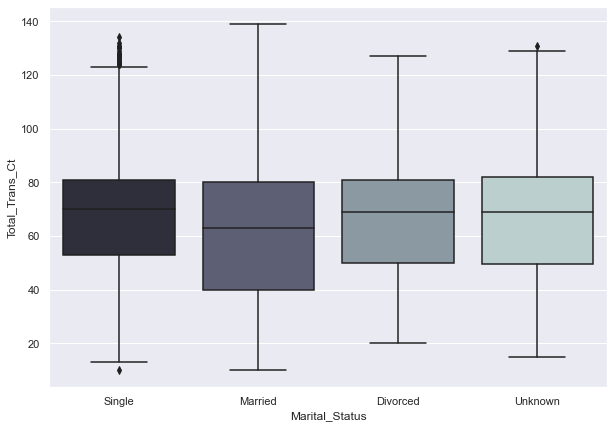

<IPython.core.display.Javascript object>

In [62]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Ct", x="Marital_Status", palette="bone", data=data, orient="vertical"
)

#### * Married customers have the highest transaction counts and amounts while single and unknown customers have the highest average transation counts and amounts.

<AxesSubplot:xlabel='Education_Level', ylabel='Total_Trans_Amt'>

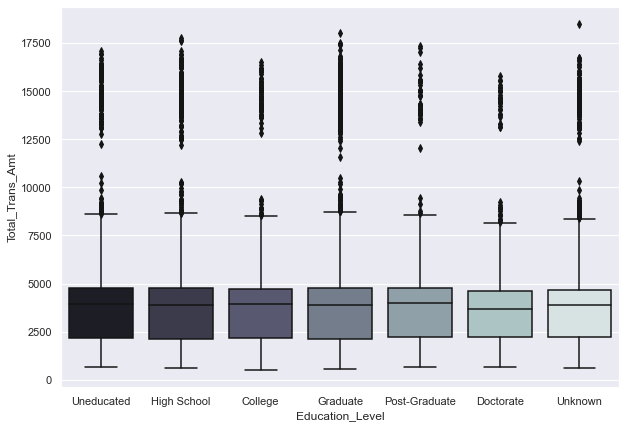

<IPython.core.display.Javascript object>

In [63]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Amt",
    x="Education_Level",
    palette="bone",
    data=data,
    orient="vertical",
)

<AxesSubplot:xlabel='Education_Level', ylabel='Total_Trans_Ct'>

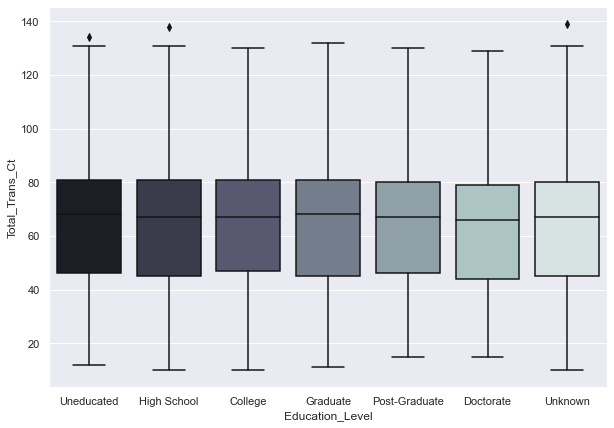

<IPython.core.display.Javascript object>

In [64]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Ct",
    x="Education_Level",
    palette="bone",
    data=data,
    orient="vertical",
)

#### * Education levels are fairly even across the board in terms of transation counts and amounts wiht a few outliers here and there.

<AxesSubplot:xlabel='Gender', ylabel='Total_Trans_Amt'>

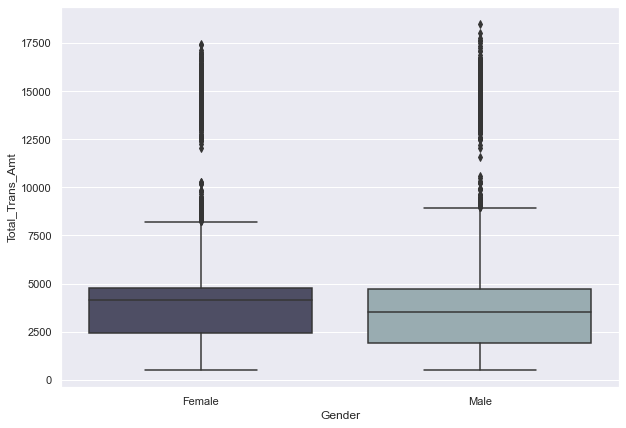

<IPython.core.display.Javascript object>

In [65]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Amt", x="Gender", palette="bone", data=data, orient="vertical"
)

<AxesSubplot:xlabel='Gender', ylabel='Total_Trans_Ct'>

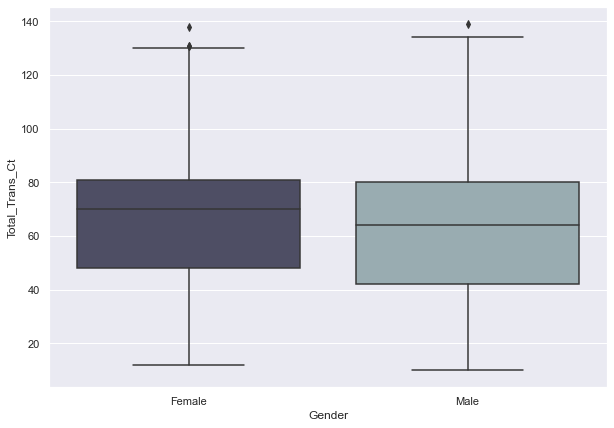

<IPython.core.display.Javascript object>

In [66]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Ct", x="Gender", palette="bone", data=data, orient="vertical"
)

#### * Although females outnumbered males in terms of overall customers, males have a higher transaction count and amount.

<AxesSubplot:xlabel='Dependent_count', ylabel='Total_Trans_Amt'>

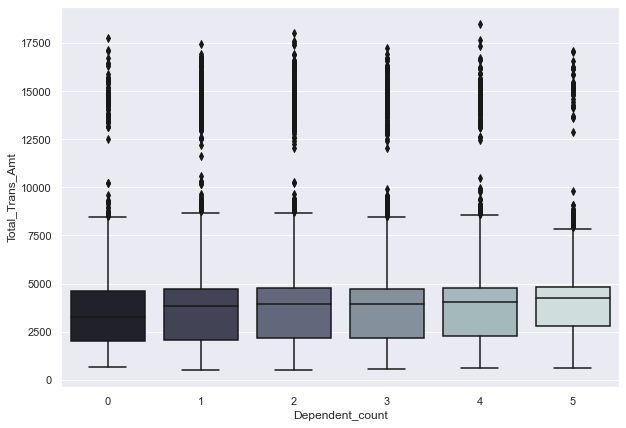

<IPython.core.display.Javascript object>

In [67]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Amt",
    x="Dependent_count",
    palette="bone",
    data=data,
    orient="vertical",
)

<AxesSubplot:xlabel='Dependent_count', ylabel='Total_Trans_Ct'>

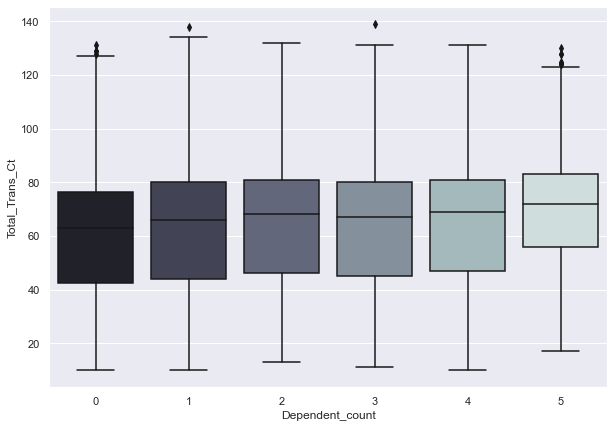

<IPython.core.display.Javascript object>

In [68]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Ct",
    x="Dependent_count",
    palette="bone",
    data=data,
    orient="vertical",
)

#### * Total transaction counts and amounts tend to rise slightly as you add more dependents.

<AxesSubplot:xlabel='Income_Category', ylabel='Total_Trans_Amt'>

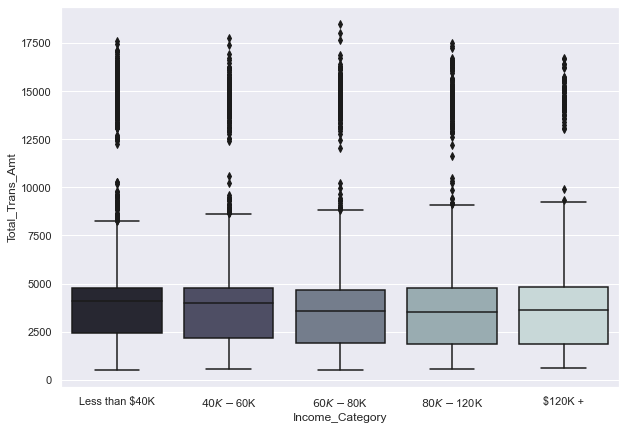

<IPython.core.display.Javascript object>

In [69]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Amt",
    x="Income_Category",
    palette="bone",
    data=data,
    orient="vertical",
)

<AxesSubplot:xlabel='Income_Category', ylabel='Total_Trans_Ct'>

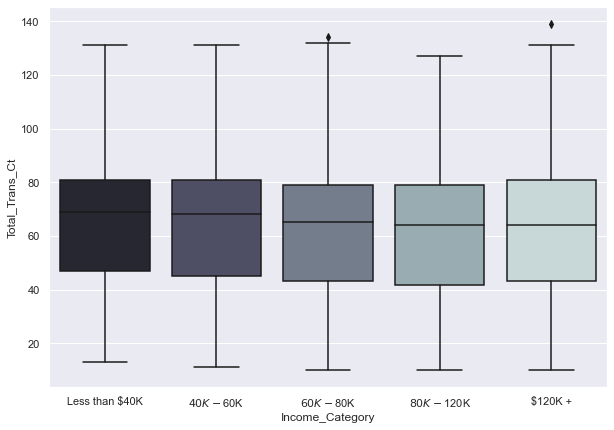

<IPython.core.display.Javascript object>

In [70]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Ct",
    x="Income_Category",
    palette="bone",
    data=data,
    orient="vertical",
)

#### * Transaction counts and amounts were fairly even across the board with the amounts raising slightly as a customers income rises.

<AxesSubplot:xlabel='Card_Category', ylabel='Total_Trans_Amt'>

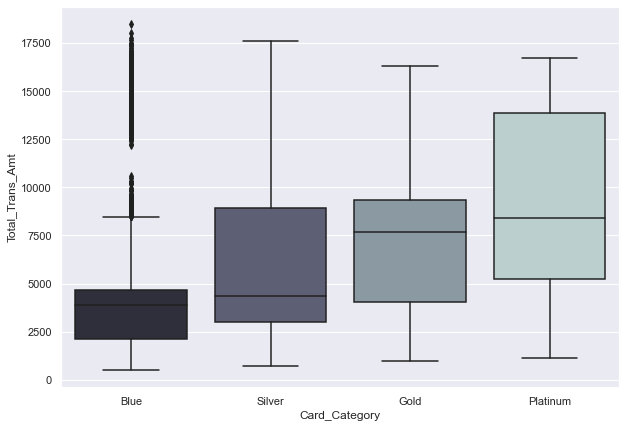

<IPython.core.display.Javascript object>

In [71]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Amt", x="Card_Category", palette="bone", data=data, orient="vertical"
)

<AxesSubplot:xlabel='Card_Category', ylabel='Total_Trans_Ct'>

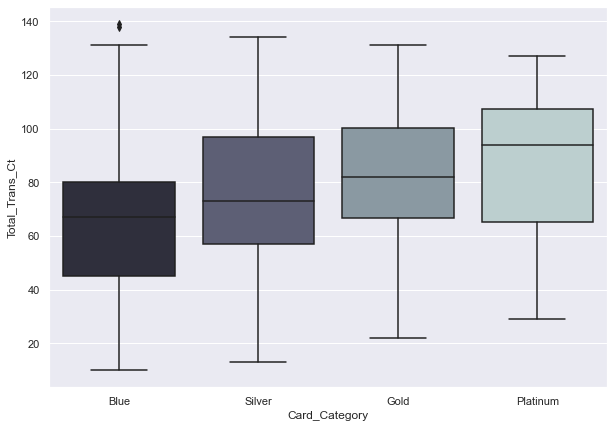

<IPython.core.display.Javascript object>

In [72]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Ct", x="Card_Category", palette="bone", data=data, orient="vertical"
)

#### * Total transaction counts and amounts averages rise from Blue, to Silver, to Gold, to Platinum indicating that this order for the cards is correct and, implies Blue cards are entry level cards and Platinum are the highest card offered.

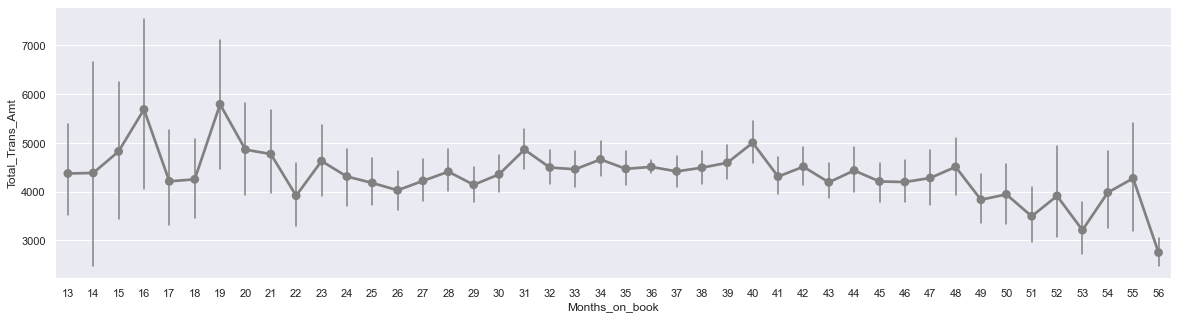

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(20, 5))
sns.pointplot(
    x="Months_on_book", y="Total_Trans_Amt", data=data, color="gray", errwidth=1.5
)
plt.show()

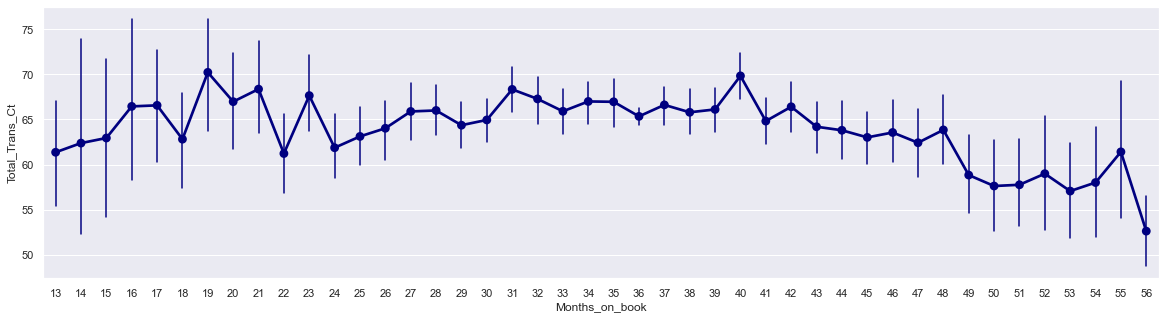

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(20, 5))
sns.pointplot(
    x="Months_on_book", y="Total_Trans_Ct", data=data, color="navy", errwidth=1.5
)
plt.show()

#### * Customers tend to have a higher total transaction amount for customer in the first 2 years of having their card while total transation counts are fairly even between 60-70 for up to 4 years then drop.

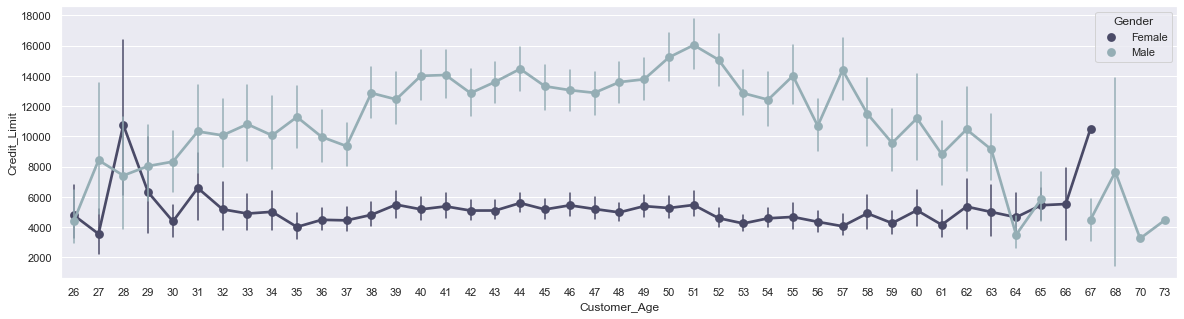

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(20, 5))
sns.pointplot(
    x="Customer_Age",
    y="Credit_Limit",
    data=data,
    hue="Gender",
    palette="bone",
    errwidth=1.5,
)
plt.show()

#### * Male customers tend to have a much higher credit limit then female customers of the same age.

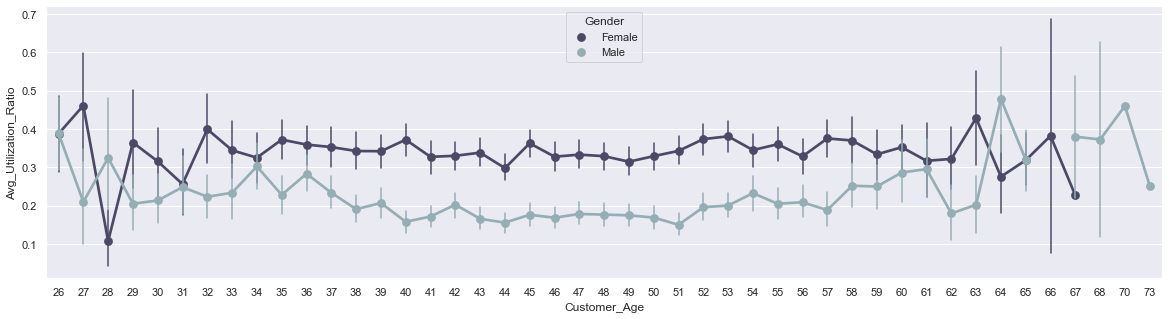

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(20, 5))
sns.pointplot(
    x="Customer_Age",
    y="Avg_Utilization_Ratio",
    data=data,
    hue="Gender",
    palette="bone",
    errwidth=1.5,
)
plt.show()

#### * Females tend to have a higher utilization ratio then males of the same age.

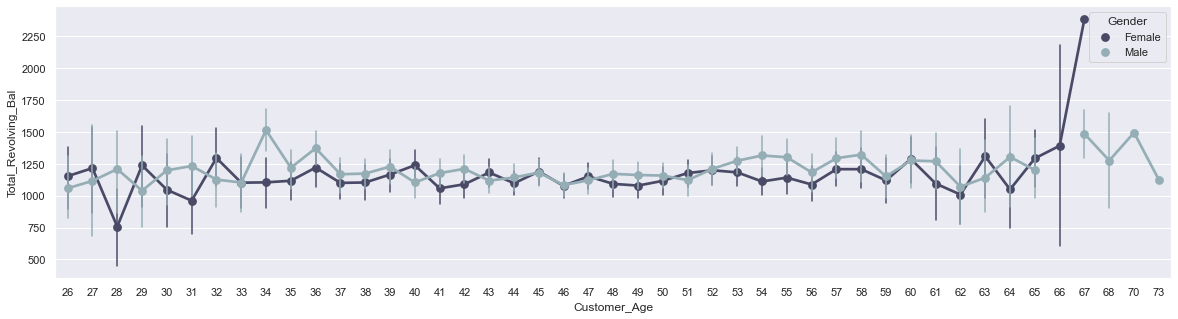

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(20, 5))
sns.pointplot(
    x="Customer_Age",
    y="Total_Revolving_Bal",
    data=data,
    hue="Gender",
    palette="bone",
    errwidth=1.5,
)
plt.show()

#### * Total revolving balances between males and females of the same age are fairly even across the board.

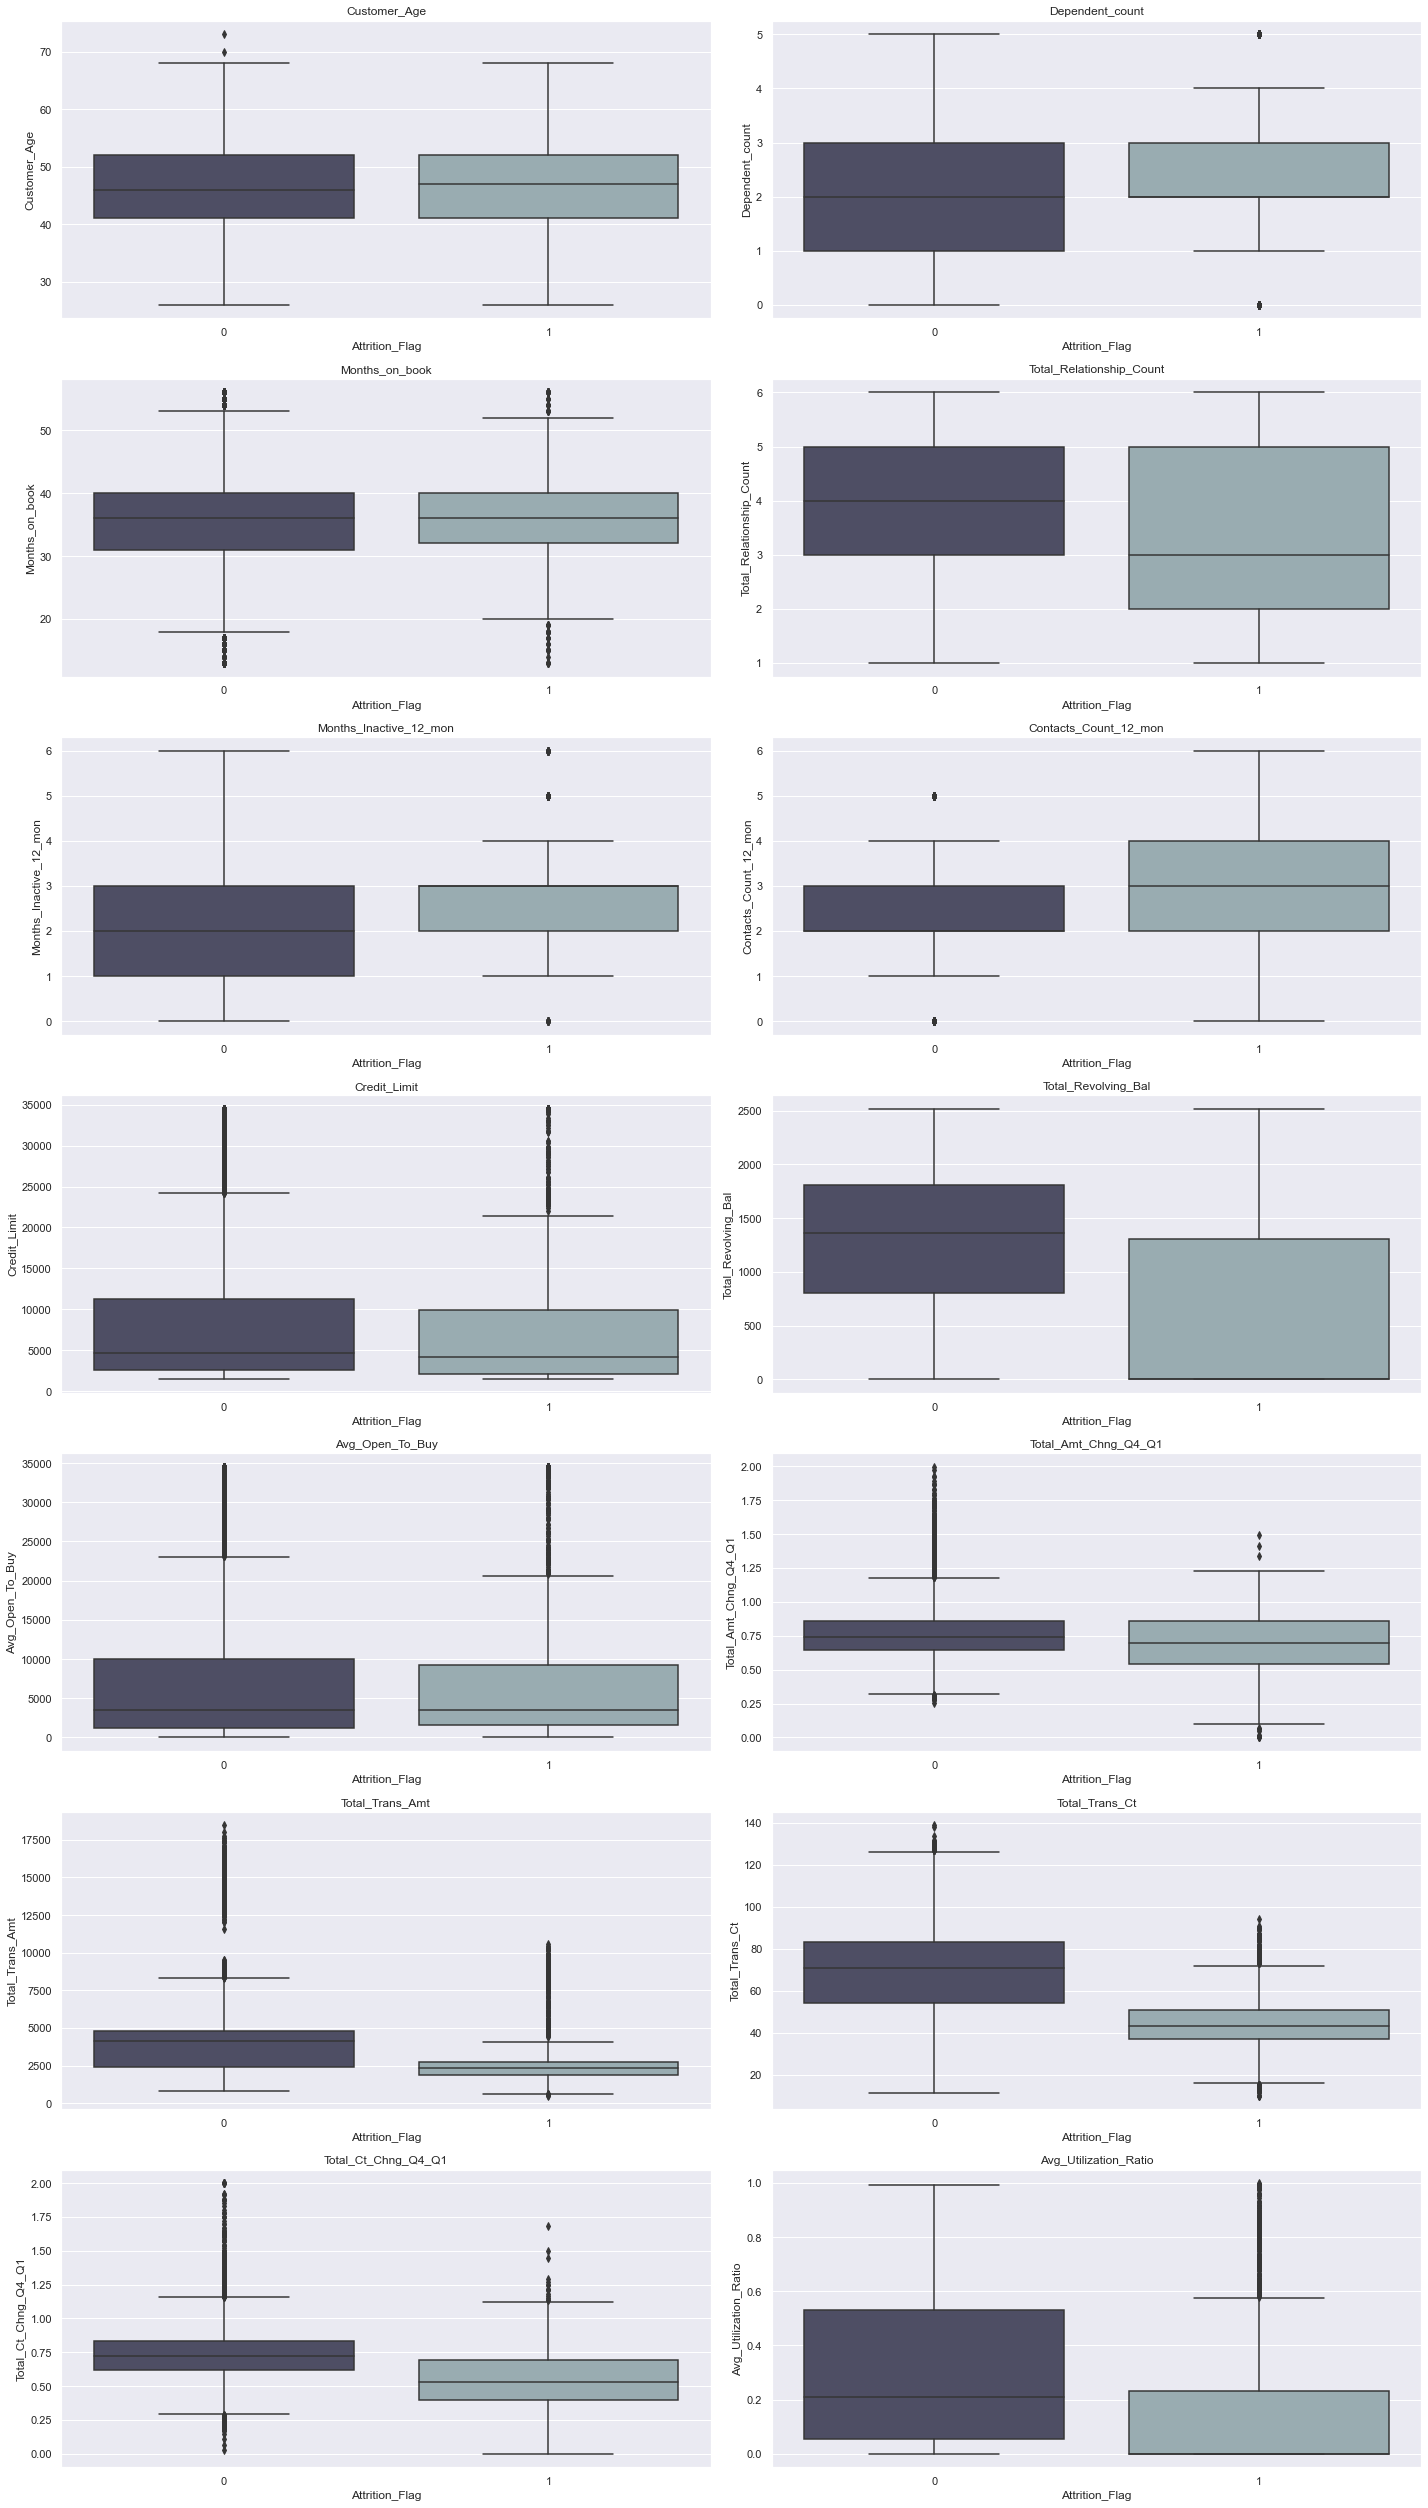

<IPython.core.display.Javascript object>

In [78]:
colsvtarg1 = data[
    [
        "Customer_Age",
        "Dependent_count",
        "Months_on_book",
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        "Avg_Utilization_Ratio",
    ]
].columns.tolist()
plt.figure(figsize=(20, 35))

for i, variable in enumerate(colsvtarg1):
    plt.subplot(7, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable], palette="bone")
    plt.tight_layout()
    plt.title(variable)
plt.show()

#### * In terms of our target variable, customers that have attrited have on average more months on book, and lower numbers in the utilization categories. This makes sense as they are no longer customers.

In [79]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Attrition_Flag     0     1    All
Gender                           
All             8460  1625  10085
Female          4411   930   5341
Male            4049   695   4744
------------------------------------------------------------------------------------------------------------------------


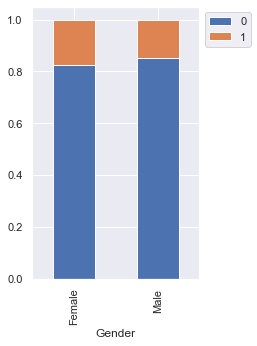

<IPython.core.display.Javascript object>

In [80]:
stacked_barplot(data, "Gender", "Attrition_Flag")

#### * There have been a higher number of females that have attrited.

Attrition_Flag      0     1    All
Dependent_count                   
All              8460  1625  10085
3                2241   481   2722
2                2232   416   2648
1                1562   269   1831
4                1304   260   1564
0                 764   135    899
5                 357    64    421
------------------------------------------------------------------------------------------------------------------------


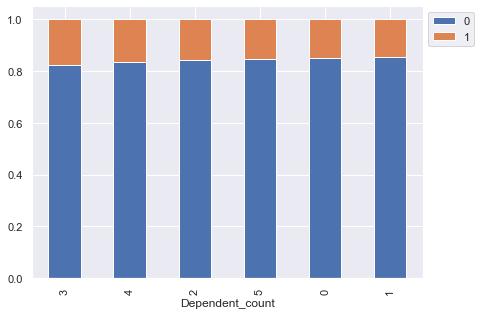

<IPython.core.display.Javascript object>

In [81]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

#### * Attrition levels are highest in the 3 dependent count.

Attrition_Flag      0     1    All
Education_Level                   
All              8460  1625  10085
Graduate         2626   487   3113
High School      1704   305   2009
Unknown          1258   256   1514
Uneducated       1241   236   1477
College           856   154   1010
Doctorate         353    95    448
Post-Graduate     422    92    514
------------------------------------------------------------------------------------------------------------------------


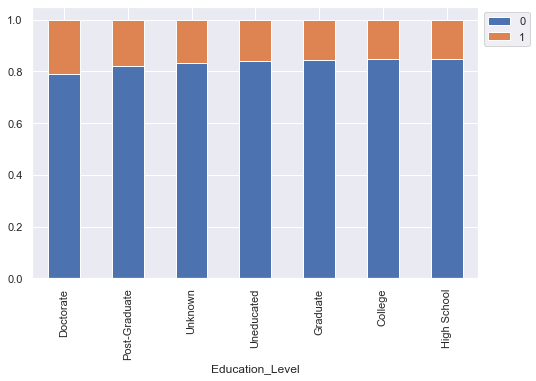

<IPython.core.display.Javascript object>

In [82]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

#### * Attrition levels are highest for people who have completed a Doctorate or Masters degree.

Attrition_Flag     0     1    All
Marital_Status                   
All             8460  1625  10085
Married         3952   707   4659
Single          3265   668   3933
Unknown          618   129    747
Divorced         625   121    746
------------------------------------------------------------------------------------------------------------------------


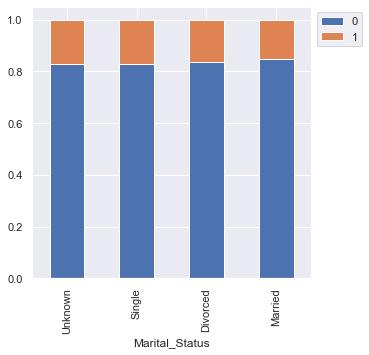

<IPython.core.display.Javascript object>

In [83]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

#### * Attrition levels are highest for Unknown or Single customers.

Attrition_Flag      0     1   All
Income_Category                  
All              7540  1438  8978
Less than $40K   2939   612  3551
$40K - $60K      1512   270  1782
$80K - $120K     1286   242  1528
$60K - $80K      1202   188  1390
$120K +           601   126   727
------------------------------------------------------------------------------------------------------------------------


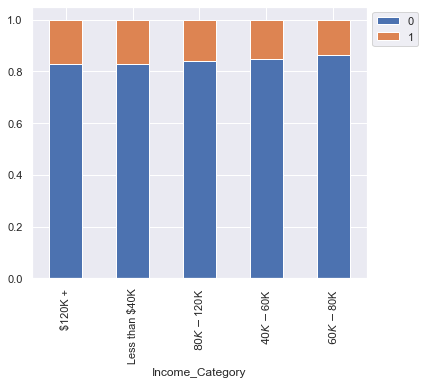

<IPython.core.display.Javascript object>

In [84]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

#### * Attrition levels are highest for the highest earning customers.

Attrition_Flag     0     1    All
Card_Category                    
All             8460  1625  10085
Blue            7881  1517   9398
Silver           469    82    551
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


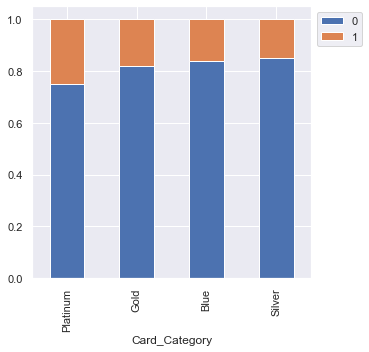

<IPython.core.display.Javascript object>

In [85]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

#### * Attrition levels are highest for Platinum card holders.

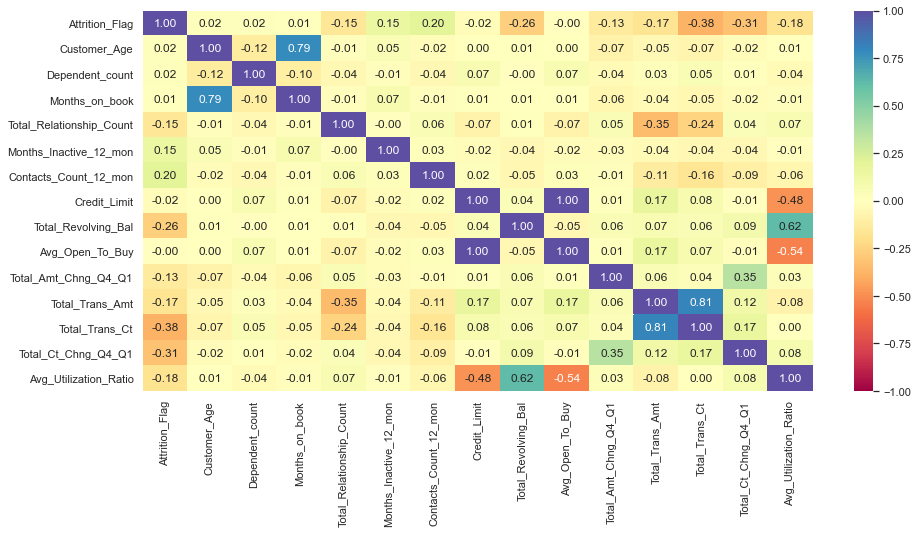

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### * Avg_Open_To_Buy and Credit_Limit have a 1.00 correlation and one will be dropped from the data set. I am choosing to drop Avg_Open_To_Buy as it has a 0.00 correlation with the target variable Attrition_Flag.
#### * Total_Trans_Amt and Total_Trans_CT are also above the .8/-.8 threshold I have set. I am choosing to drop Total_Trans_Amt as the correlation with the target variable Attrition_Flag is closer to 0 between the two.

In [87]:
data.drop(columns=["Avg_Open_To_Buy", "Total_Trans_Amt"], inplace=True)

<IPython.core.display.Javascript object>

In [88]:
# To verify the change
data.sample(10, random_state=2)

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
6195               1            57  Female                2       Doctorate   
5047               0            43  Female                3       Doctorate   
3011               0            56    Male                2        Graduate   
7225               0            48  Female                3        Graduate   
5295               0            43  Female                3         Unknown   
6707               0            45  Female                4        Graduate   
9909               0            53    Male                3         Unknown   
9807               0            47    Male                2         College   
1999               1            26  Female                0   Post-Graduate   
8699               0            53  Female                4        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
6195        Married  Less than $40K          Blue              36   
5047        Married  Less than $40K          Blue              29   
3011        Married    $80K - $120K          Blue              36   
7225         Single  Less than $40K          Blue              35   
5295        Married  Less than $40K          Blue              30   
6707         Single  Less than $40K          Blue              36   
9909         Single    $80K - $120K          Blue              43   
9807        Married     $40K - $60K          Blue              37   
1999         Single  Less than $40K          Blue              15   
8699         Single  Less than $40K          Blue              44   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6195                         1                       3                      3   
5047                         4                       2                      3   
3011                         4                       2                      3   
7225                         3                       4                      3   
5295                         5                       2                      2   
6707                         3                       1                      3   
9909                         4                       3                      4   
9807                         6                       3                      1   
1999                         3                       2                      3   
8699                         1                       1                      3   

      Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
6195      1615.000                  950                 0.507              43   
5047      3186.000                 2517                 0.590              84   
3011     23510.000                 1049                 0.438              35   
7225      1815.000                  557                 0.672              76   
5295      2415.000                 1452                 0.609              68   
6707      3562.000                 2107                 0.394              90   
9909     34516.000                 1084                 0.686             124   
9807      3263.000                 1525                 0.542             110   
1999      1442.000                 1428                 0.496              26   
8699      4737.000                 1649                 0.748              88   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
6195                0.387                  0.588  
5047                0.909                  0.790  
3011                0.296                  0.045  
7225                0.854                  0.307  
5295                0.619                  0.601  
6707                0.667                  0.592  
9909                0.699                  0.031  
9807                0.833                  0.467  
1999                0.238                  0.990  
8699                0.492                  0.348

<IPython.core.display.Javascript object>

#### * Great it worked, on to model prep.

# 5. Preparing Data for Modeling 

#### Splitting data and getting dummies for categorical columns

In [89]:
# Separating target variable and other variables
data1 = pd.get_dummies(
    data,
    columns=[
        "Gender",
        "Education_Level",
        "Marital_Status",
        "Income_Category",
        "Card_Category",
    ],
    drop_first=True,
)

X = data1.drop(columns="Attrition_Flag")


Y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [90]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6051, 29) (2017, 29) (2017, 29)


<IPython.core.display.Javascript object>

In [92]:
# Checking the breakdown of data in each set
print(
    "{0:0.2f}% data is in training set".format((len(X_train) / len(data1.index)) * 100)
)
print(
    "{0:0.2f}% data is in validation set".format((len(X_val) / len(data1.index)) * 100)
)
print("{0:0.2f}% data is in test set".format((len(X_test) / len(data1.index)) * 100))

60.00% data is in training set
20.00% data is in validation set
20.00% data is in test set


<IPython.core.display.Javascript object>

#### * 60/20/20 split as planned.

In [98]:
print(
    "Original Customer Attrition True Values    : {0} ({1:0.2f}%)".format(
        len(data1.loc[data1["Attrition_Flag"] == 1]),
        (len(data1.loc[data1["Attrition_Flag"] == 1]) / len(data1.index)) * 100,
    )
)
print(
    "Original Customer Attrition False Values   : {0} ({1:0.2f}%)".format(
        len(data1.loc[data1["Attrition_Flag"] == 0]),
        (len(data1.loc[data1["Attrition_Flag"] == 0]) / len(data1.index)) * 100,
    )
)
print("")
print(
    "Training Customer Attrition True Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training Customer Attrition False Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Validation Customer Attrition True Values  : {0} ({1:0.2f}%)".format(
        len(y_val[y_val[:] == 1]), (len(y_val[y_val[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Validation Customer Attrition False Values : {0} ({1:0.2f}%)".format(
        len(y_val[y_val[:] == 0]), (len(y_val[y_val[:] == 0]) / len(y_test)) * 100
    )
)
print("")
print(
    "Test Customer Attrition True Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test Customer Attrition False Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)

Original Customer Attrition True Values    : 1625 (16.11%)
Original Customer Attrition False Values   : 8460 (83.89%)

Training Customer Attrition True Values    : 975 (16.11%)
Training Customer Attrition False Values   : 5076 (83.89%)

Validation Customer Attrition True Values  : 325 (16.11%)
Validation Customer Attrition False Values : 1692 (83.89%)

Test Customer Attrition True Values        : 325 (16.11%)
Test Customer Attrition False Values       : 1692 (83.89%)


<IPython.core.display.Javascript object>

#### * Even distribution of the target variable across Training/Validation/Test Split and is equal to the original distrobution.

#### Missing Value Treatment for np.NaN values added to the Income_Category column

In [99]:
imputer = SimpleImputer(strategy="most_frequent")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

In [100]:
# Checking the function of the imputer
data1.isnull().sum().sort_values(ascending=False)

Attrition_Flag                   0
Customer_Age                     0
Card_Category_Gold               0
Card_Category_Silver             0
Income_Category_$120K +          0
Income_Category_$80K - $120K     0
Income_Category_$60K - $80K      0
Income_Category_$40K - $60K      0
Marital_Status_Unknown           0
Marital_Status_Divorced          0
Marital_Status_Married           0
Education_Level_Unknown          0
Education_Level_Doctorate        0
Education_Level_Post-Graduate    0
Education_Level_Graduate         0
Education_Level_College          0
Education_Level_High School      0
Gender_Male                      0
Avg_Utilization_Ratio            0
Total_Ct_Chng_Q4_Q1              0
Total_Trans_Ct                   0
Total_Amt_Chng_Q4_Q1             0
Total_Revolving_Bal              0
Credit_Limit                     0
Contacts_Count_12_mon            0
Months_Inactive_12_mon           0
Total_Relationship_Count         0
Months_on_book                   0
Dependent_count     

<IPython.core.display.Javascript object>

In [101]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10085 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attrition_Flag                 10085 non-null  int64  
 1   Customer_Age                   10085 non-null  int64  
 2   Dependent_count                10085 non-null  int64  
 3   Months_on_book                 10085 non-null  int64  
 4   Total_Relationship_Count       10085 non-null  int64  
 5   Months_Inactive_12_mon         10085 non-null  int64  
 6   Contacts_Count_12_mon          10085 non-null  int64  
 7   Credit_Limit                   10085 non-null  float64
 8   Total_Revolving_Bal            10085 non-null  int64  
 9   Total_Amt_Chng_Q4_Q1           10085 non-null  float64
 10  Total_Trans_Ct                 10085 non-null  int64  
 11  Total_Ct_Chng_Q4_Q1            10085 non-null  float64
 12  Avg_Utilization_Ratio          10085 non-null 

<IPython.core.display.Javascript object>

# 6. Modeling 

### Model Evaluation Criteria

##### Model can make wrong predictions as:
* 1) Type 1 False Positive, Predicting a customer will attrite and they do not.
* 2) Type 2 False Negative, Predicting a customer will not attrite and they do. 

##### Which false prediction is more important?
* Thera Bank is trying to minimize the amount of customer attrition. It would be more detrimental for the bank to lose customers (attrite) then to remain an existing customer. With that in mind I want to reduce the amount of False Negatives. Meaning that I want to reduce the amount of customers predicted not to attrite and they do. If I predict a customer will attrite and they do not the bank is still not losing a customer.

##### How do I evaluate the models to determine which is best?
* In order to determine which model is best I need to use an evaluation method that looks at False Negative responses. Recall will be a good metric for the FN responses., I will judge models based on the best Recall score. My goal is to get a recall above .85.

In [102]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [103]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Base Models KFold analysis

In [108]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression: 43.794871794871796
Decision Tree: 67.28205128205128
Bagging: 65.94871794871796
Random Forest: 64.61538461538461
Gradient Boosting: 70.15384615384616
Adaboost: 70.97435897435898
Xgboost: 74.05128205128206

Training Performance:

Logistic Regression: 47.48717948717949
Decision Tree: 100.0
Bagging: 97.02564102564104
Random Forest: 100.0
Gradient Boosting: 76.82051282051282
Adaboost: 72.71794871794872
Xgboost: 99.8974358974359


<IPython.core.display.Javascript object>

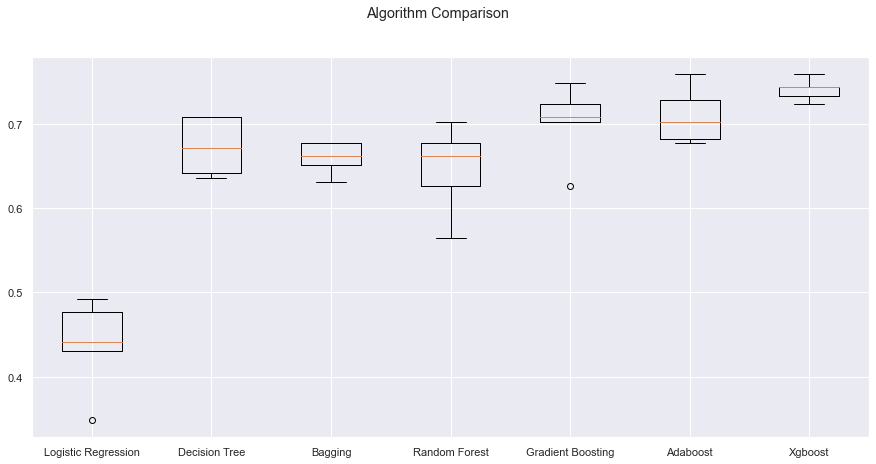

<IPython.core.display.Javascript object>

In [110]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#### * Looking at the base model comparison function Gradient Boost, AdaBoost, and XGBoost have the highest average score as well as the highest outlier score when run as base models. I will likely use these three models for Hyperparameter tuning. I will be dropping the Logistic Regression model from this study.

## Base Models

#### Decision Tree Classifier

In [111]:
dtree = DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [112]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

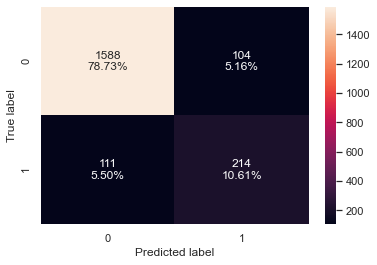

<IPython.core.display.Javascript object>

In [113]:
confusion_matrix_sklearn(dtree, X_val, y_val)

In [114]:
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


<IPython.core.display.Javascript object>

In [115]:
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_val, y_val)
print("Testing performance \n", dtree_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.893   0.658      0.673 0.666


<IPython.core.display.Javascript object>

#### * The recall on the validation set is 0.658. 

#### Bagging Classifier

In [117]:
bag = BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [118]:
bag.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

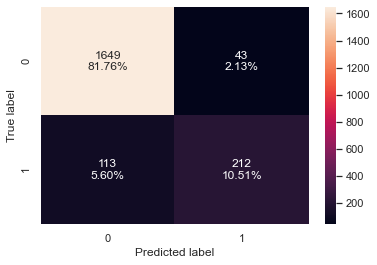

<IPython.core.display.Javascript object>

In [119]:
confusion_matrix_sklearn(bag, X_val, y_val)

In [122]:
bag_model_train_perf = model_performance_classification_sklearn(bag, X_train, y_train)
print("Training performance \n", bag_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.994   0.970      0.995 0.982


<IPython.core.display.Javascript object>

In [123]:
bag_model_test_perf = model_performance_classification_sklearn(bag, X_val, y_val)
print("Testing performance \n", bag_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.923   0.652      0.831 0.731


<IPython.core.display.Javascript object>

#### * The recall on the validation set is 0.652 which is slightly worse then the decision tree model. 

#### Random Forest Classifier

In [124]:
rf = RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [125]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

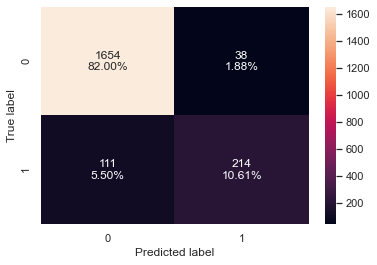

<IPython.core.display.Javascript object>

In [126]:
confusion_matrix_sklearn(rf, X_val, y_val)

In [127]:
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance \n", rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


<IPython.core.display.Javascript object>

In [128]:
rf_model_test_perf = model_performance_classification_sklearn(rf, X_val, y_val)
print("Testing performance \n", rf_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.926   0.658      0.849 0.742


<IPython.core.display.Javascript object>

#### * The recall on the validation set is 0.658 which is on par with the decision tree model.

#### Adaboost Classifier

In [129]:
abc = AdaBoostClassifier(random_state=1

<IPython.core.display.Javascript object>

In [130]:
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

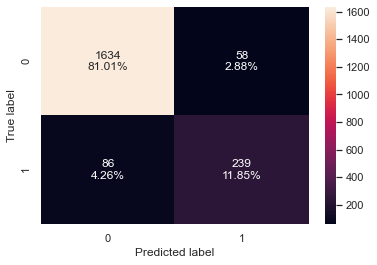

<IPython.core.display.Javascript object>

In [131]:
confusion_matrix_sklearn(abc, X_val, y_val)

In [132]:
abc_model_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
print("Training performance \n", abc_model_train_perf)


Training performance 
    Accuracy  Recall  Precision    F1
0     0.930   0.727      0.819 0.770


<IPython.core.display.Javascript object>

In [133]:
abc_model_test_perf = model_performance_classification_sklearn(abc, X_val, y_val)
print("Testing performance \n", abc_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.929   0.735      0.805 0.768


<IPython.core.display.Javascript object>

#### * The recall on the validation set is 0.735 which is higher then previous models.

#### Gradient Boost Classifier

In [134]:
gbc = GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [135]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

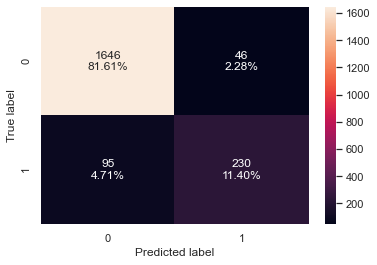

<IPython.core.display.Javascript object>

In [136]:
confusion_matrix_sklearn(gbc, X_val, y_val)

In [137]:
gbc_model_train_perf = model_performance_classification_sklearn(gbc, X_train, y_train)
print("Training performance \n", gbc_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.949   0.768      0.898 0.828


<IPython.core.display.Javascript object>

In [138]:
gbc_model_test_perf = model_performance_classification_sklearn(gbc, X_val, y_val)
print("Testing performance \n", gbc_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.930   0.708      0.833 0.765


<IPython.core.display.Javascript object>

#### * The recall on the validation set is 0.708 which is lower then AdaBoost classifier model.

#### XGBoost Classifier

In [139]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")

<IPython.core.display.Javascript object>

In [140]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

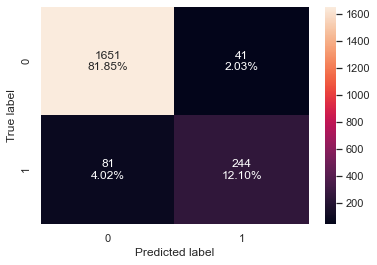

<IPython.core.display.Javascript object>

In [141]:
confusion_matrix_sklearn(xgb, X_val, y_val)

In [142]:
xgb_model_train_perf = model_performance_classification_sklearn(xgb, X_train, y_train)
print("Training performance \n", xgb_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   0.999      1.000 0.999


<IPython.core.display.Javascript object>

In [143]:
xgb_model_test_perf = model_performance_classification_sklearn(xgb, X_val, y_val)
print("Testing performance \n", xgb_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.940   0.751      0.856 0.800


<IPython.core.display.Javascript object>

#### * The recall on the validation set is 0.751 which is the best score yet, but I think I can do better.

## Comparing the base models

In [266]:
# test performance comparison

base_models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        bag_model_test_perf.T,
        rf_model_test_perf.T,
        abc_model_test_perf.T,
        gbc_model_test_perf.T,
        xgb_model_test_perf.T,
    ],
    axis=1,
)
base_models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "AdaBoost Classifier",
    "Gradient Boost Classifier",
    "XGBoost Classifier",
]
print("Testing performance comparison:")
base_models_test_comp_df.T

Testing performance comparison:


Accuracy  Recall  Precision    F1
Decision Tree                 0.893   0.658      0.673 0.666
Bagging Classifier            0.923   0.652      0.831 0.731
Random Forest Classifier      0.926   0.658      0.849 0.742
AdaBoost Classifier           0.929   0.735      0.805 0.768
Gradient Boost Classifier     0.930   0.708      0.833 0.765
XGBoost Classifier            0.940   0.751      0.856 0.800

<IPython.core.display.Javascript object>

#### * As seen the XGBoost Classifier performed best in Recall between the six base models.

## Oversampled Models

In [148]:
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Before Oversampling, counts of label 'Attrited': {}".format(sum(y_train == 1)))
print(
    "Before Oversampling, counts of label 'Existing': {} \n".format(sum(y_train == 0))
)

print(
    "After Oversampling, counts of label 'Attrited': {}".format(sum(y_train_over == 1))
)
print(
    "After Oversampling, counts of label 'Existing': {} \n".format(
        sum(y_train_over == 0)
    )
)


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Attrited': 975
Before Oversampling, counts of label 'Existing': 5076 

After Oversampling, counts of label 'Attrited': 5076
After Oversampling, counts of label 'Existing': 5076 

After Oversampling, the shape of train_X: (10152, 29)
After Oversampling, the shape of train_y: (10152,) 



<IPython.core.display.Javascript object>

#### Oversampled Decision Tree Classifier

In [149]:
dtree_over = DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [152]:
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

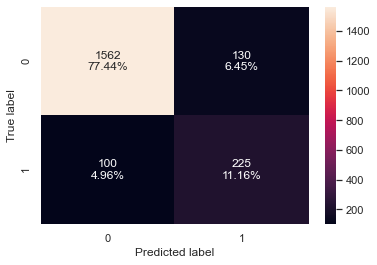

<IPython.core.display.Javascript object>

In [153]:
confusion_matrix_sklearn(dtree_over, X_val, y_val)

In [154]:
dtree_over_model_train_perf = model_performance_classification_sklearn(
    dtree_over, X_train_over, y_train_over
)
print("Training performance \n", dtree_over_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


<IPython.core.display.Javascript object>

In [155]:
dtree_over_model_test_perf = model_performance_classification_sklearn(
    dtree_over, X_val, y_val
)
print("Testing performance \n", dtree_over_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.886   0.692      0.634 0.662


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.692 from 0.658.

#### Oversampled Bagging Classifier

In [156]:
bag_over = BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [157]:
bag_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

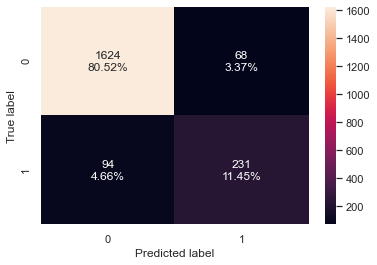

<IPython.core.display.Javascript object>

In [158]:
confusion_matrix_sklearn(bag_over, X_val, y_val)

In [159]:
bag_over_model_train_perf = model_performance_classification_sklearn(
    bag_over, X_train_over, y_train_over
)
print("Training performance \n", bag_over_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.997   0.997      0.998 0.997


<IPython.core.display.Javascript object>

In [160]:
bag_over_model_test_perf = model_performance_classification_sklearn(
    bag_over, X_val, y_val
)
print("Testing performance \n", bag_over_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.920   0.711      0.773 0.740


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.711 from 0.652.

#### Oversampled Random Forest Classifier

In [161]:
rf_over = RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [162]:
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

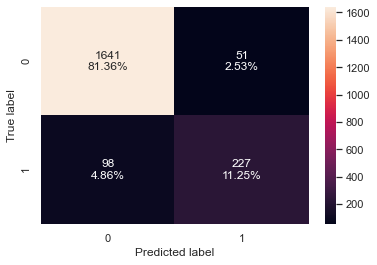

<IPython.core.display.Javascript object>

In [163]:
confusion_matrix_sklearn(rf_over, X_val, y_val)

In [164]:
rf_over_model_train_perf = model_performance_classification_sklearn(
    rf_over, X_train_over, y_train_over
)
print("Training performance \n", rf_over_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


<IPython.core.display.Javascript object>

In [165]:
rf_over_model_test_perf = model_performance_classification_sklearn(
    rf_over, X_val, y_val
)
print("Testing performance \n", rf_over_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.926   0.698      0.817 0.753


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.698 from 0.658.

#### Oversampled Adaboost Classifier

In [166]:
abc_over = AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [167]:
abc_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

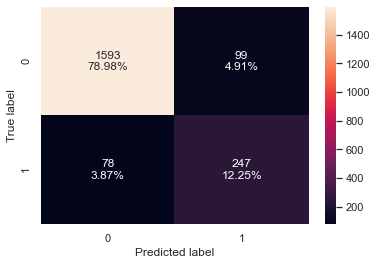

<IPython.core.display.Javascript object>

In [168]:
confusion_matrix_sklearn(abc_over, X_val, y_val)

In [169]:
abc_over_model_train_perf = model_performance_classification_sklearn(
    abc_over, X_train_over, y_train_over
)
print("Training performance \n", abc_over_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.946   0.946      0.947 0.946


<IPython.core.display.Javascript object>

In [170]:
abc_over_model_test_perf = model_performance_classification_sklearn(
    abc_over, X_val, y_val
)
print("Testing performance \n", abc_over_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.912   0.760      0.714 0.736


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.760 from 0.735.

#### Oversampled Gradient Boost Classifier

In [171]:
gbc_over = GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [172]:
gbc_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

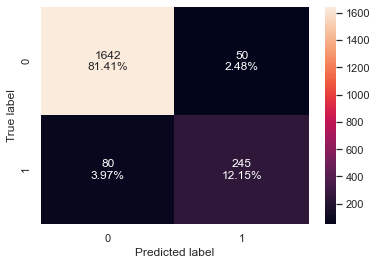

<IPython.core.display.Javascript object>

In [173]:
confusion_matrix_sklearn(gbc_over, X_val, y_val)

In [174]:
gbc_over_model_train_perf = model_performance_classification_sklearn(
    gbc_over, X_train_over, y_train_over
)
print("Training performance \n", gbc_over_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.967   0.960      0.974 0.967


<IPython.core.display.Javascript object>

In [175]:
gbc_over_model_test_perf = model_performance_classification_sklearn(
    gbc_over, X_val, y_val
)
print("Testing performance \n", gbc_over_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.936   0.754      0.831 0.790


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.754 from 0.708. 

#### Oversampled XG Boost Classifier

In [183]:
xgb_over = XGBClassifier(random_state=1, eval_metric="logloss")

<IPython.core.display.Javascript object>

In [184]:
xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

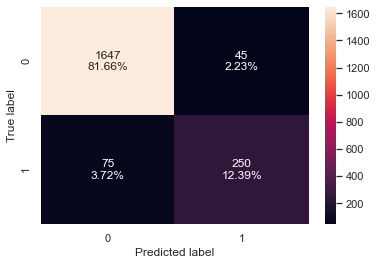

<IPython.core.display.Javascript object>

In [185]:
confusion_matrix_sklearn(xgb_over, X_val, y_val)

In [186]:
xgb_over_model_train_perf = model_performance_classification_sklearn(
    xgb_over, X_train_over, y_train_over
)
print("Training performance \n", xgb_over_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


<IPython.core.display.Javascript object>

In [187]:
xgb_over_model_test_perf = model_performance_classification_sklearn(
    xgb_over, X_val, y_val
)
print("Testing performance \n", xgb_over_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.941   0.769      0.847 0.806


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.769 from 0.751. 

In [265]:
# test performance comparison

over_models_test_comp_df = pd.concat(
    [
        dtree_over_model_test_perf.T,
        bag_over_model_test_perf.T,
        rf_over_model_test_perf.T,
        abc_over_model_test_perf.T,
        gbc_over_model_test_perf.T,
        xgb_over_model_test_perf.T,
    ],
    axis=1,
)
over_models_test_comp_df.columns = [
    "Oversampled Decision Tree",
    "Oversampled Bagging Classifier",
    "Oversampled Random Forest Classifier",
    "Oversampled AdaBoost Classifier",
    "Oversampled Gradient Boost Classifier",
    "Oversampled XGBoost Classifier",
]
print("Testing performance comparison:")
over_models_test_comp_df.T

Testing performance comparison:


Accuracy  Recall  Precision    F1
Oversampled Decision Tree                 0.886   0.692      0.634 0.662
Oversampled Bagging Classifier            0.920   0.711      0.773 0.740
Oversampled Random Forest Classifier      0.926   0.698      0.817 0.753
Oversampled AdaBoost Classifier           0.912   0.760      0.714 0.736
Oversampled Gradient Boost Classifier     0.936   0.754      0.831 0.790
Oversampled XGBoost Classifier            0.941   0.769      0.847 0.806

<IPython.core.display.Javascript object>

#### * As seen the Oversampled XGBoost Classifier performed best in Recall between the six oversampled models.

## Undersampled Models

In [189]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Undersampling, counts of label 'Attrited': {}".format(sum(y_train == 1)))
print(
    "Before Undersampling, counts of label 'Existing': {} \n".format(sum(y_train == 0))
)

print(
    "After Undersampling, counts of label 'Attrited': {}".format(sum(y_train_un == 1))
)
print(
    "After Undersampling, counts of label 'Existing': {} \n".format(
        sum(y_train_un == 0)
    )
)

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Attrited': 975
Before Undersampling, counts of label 'Existing': 5076 

After Undersampling, counts of label 'Attrited': 975
After Undersampling, counts of label 'Existing': 975 

After Undersampling, the shape of train_X: (1950, 29)
After Undersampling, the shape of train_y: (1950,) 



<IPython.core.display.Javascript object>

#### Undersampled Decision Tree Classifier

In [190]:
dtree_un = DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [191]:
dtree_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

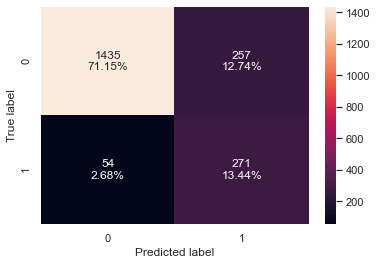

<IPython.core.display.Javascript object>

In [192]:
confusion_matrix_sklearn(dtree_un, X_val, y_val)

In [193]:
dtree_un_model_train_perf = model_performance_classification_sklearn(
    dtree_un, X_train_un, y_train_un
)
print("Training performance \n", dtree_un_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


<IPython.core.display.Javascript object>

In [194]:
dtree_un_model_test_perf = model_performance_classification_sklearn(
    dtree_un, X_val, y_val
)
print("Testing performance \n", dtree_un_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.846   0.834      0.513 0.635


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.834 up from 0.692 for the oversampled dtree.

#### Undersampled Bagging Classifier

In [195]:
bag_un = BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [196]:
bag_un.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

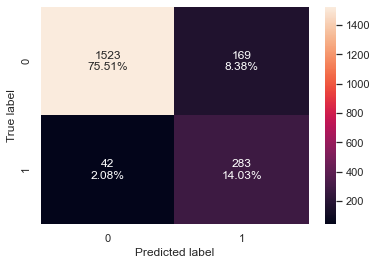

<IPython.core.display.Javascript object>

In [197]:
confusion_matrix_sklearn(bag_un, X_val, y_val)

In [198]:
bag_un_model_train_perf = model_performance_classification_sklearn(
    bag_un, X_train_un, y_train_un
)
print("Training performance \n", bag_un_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.991   0.986      0.996 0.991


<IPython.core.display.Javascript object>

In [199]:
bag_un_model_test_perf = model_performance_classification_sklearn(bag_un, X_val, y_val)
print("Testing performance \n", bag_un_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.895   0.871      0.626 0.728


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.871 from 0.711 for the oversampled data.

#### Undersampled Random Forest Classifier

In [200]:
rf_un = RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [201]:
rf_un.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

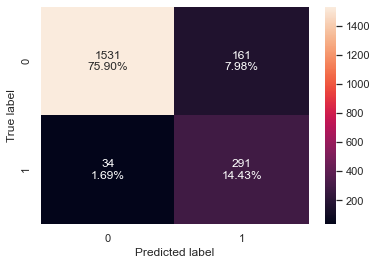

<IPython.core.display.Javascript object>

In [202]:
confusion_matrix_sklearn(rf_un, X_val, y_val)

In [203]:
rf_un_model_train_perf = model_performance_classification_sklearn(
    rf_un, X_train_un, y_train_un
)
print("Training performance \n", rf_un_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


<IPython.core.display.Javascript object>

In [204]:
rf_un_model_test_perf = model_performance_classification_sklearn(rf_un, X_val, y_val)
print("Testing performance \n", rf_un_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.903   0.895      0.644 0.749


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.895 from 0.698 for the oversampled data.

#### Undersampled Adaboost Classifier

In [205]:
abc_un = AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [206]:
abc_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

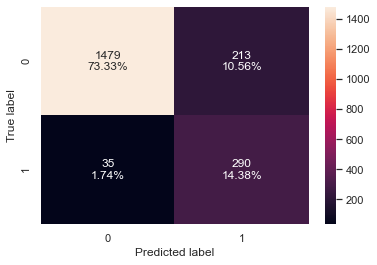

<IPython.core.display.Javascript object>

In [207]:
confusion_matrix_sklearn(abc_un, X_val, y_val)

In [209]:
abc_un_model_train_perf = model_performance_classification_sklearn(
    abc_un, X_train_un, y_train_un
)
print("Training performance \n", abc_un_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.896   0.894      0.897 0.896


<IPython.core.display.Javascript object>

In [210]:
abc_un_model_test_perf = model_performance_classification_sklearn(abc_un, X_val, y_val)
print("Testing performance \n", abc_un_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.877   0.892      0.577 0.700


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.892 to 0.760 for the oversampled data.

#### Undersampled Gradient Boost Classifier

In [211]:
gbc_un = GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [212]:
gbc_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

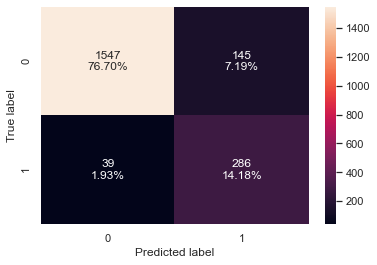

<IPython.core.display.Javascript object>

In [213]:
confusion_matrix_sklearn(gbc_un, X_val, y_val)

In [214]:
gbc_un_model_train_perf = model_performance_classification_sklearn(
    gbc_un, X_train_un, y_train_un
)
print("Training performance \n", gbc_un_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.941   0.937      0.943 0.940


<IPython.core.display.Javascript object>

In [215]:
gbc_un_model_test_perf = model_performance_classification_sklearn(gbc_un, X_val, y_val)
print("Testing performance \n", gbc_un_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.909   0.880      0.664 0.757


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.880 from 0.754 for the oversampled data. 

#### Undersampled XG Boost Classifier

In [216]:
xgb_un = XGBClassifier(random_state=1, eval_metric="logloss")

<IPython.core.display.Javascript object>

In [217]:
xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

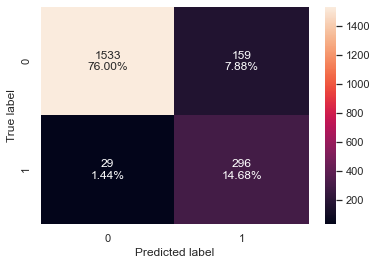

<IPython.core.display.Javascript object>

In [218]:
confusion_matrix_sklearn(xgb_un, X_val, y_val)

In [219]:
xgb_un_model_train_perf = model_performance_classification_sklearn(
    xgb_un, X_train_un, y_train_un
)
print("Training performance \n", xgb_un_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


<IPython.core.display.Javascript object>

In [220]:
xgb_un_model_test_perf = model_performance_classification_sklearn(xgb_un, X_val, y_val)
print("Testing performance \n", xgb_un_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.907   0.911      0.651 0.759


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.911 from 0.769 for the oversampled data. This is the best model so far.

In [267]:
# test performance comparison

un_models_test_comp_df = pd.concat(
    [
        dtree_un_model_test_perf.T,
        bag_un_model_test_perf.T,
        rf_un_model_test_perf.T,
        abc_un_model_test_perf.T,
        gbc_un_model_test_perf.T,
        xgb_un_model_test_perf.T,
    ],
    axis=1,
)
un_models_test_comp_df.columns = [
    "Undersampled Decision Tree",
    "Undersampled Bagging Classifier",
    "Undersampled Random Forest Classifier",
    "Undersampled AdaBoost Classifier",
    "Undersampled Gradient Boost Classifier",
    "Undersampled XGBoost Classifier",
]
print("Testing performance comparison:")
un_models_test_comp_df.T

Testing performance comparison:


Accuracy  Recall  Precision    F1
Undersampled Decision Tree                 0.846   0.834      0.513 0.635
Undersampled Bagging Classifier            0.895   0.871      0.626 0.728
Undersampled Random Forest Classifier      0.903   0.895      0.644 0.749
Undersampled AdaBoost Classifier           0.877   0.892      0.577 0.700
Undersampled Gradient Boost Classifier     0.909   0.880      0.664 0.757
Undersampled XGBoost Classifier            0.907   0.911      0.651 0.759

<IPython.core.display.Javascript object>

#### * As seen the Undersampled XGBoost Classifier performed best in Recall between the six undersampled models.

## Comparison of base, oversampled, and undersampled models

In [223]:
# test performance comparison

all_models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        bag_model_test_perf.T,
        rf_model_test_perf.T,
        abc_model_test_perf.T,
        gbc_model_test_perf.T,
        xgb_model_test_perf.T,
        dtree_over_model_test_perf.T,
        bag_over_model_test_perf.T,
        rf_over_model_test_perf.T,
        abc_over_model_test_perf.T,
        gbc_over_model_test_perf.T,
        xgb_over_model_test_perf.T,
        dtree_un_model_test_perf.T,
        bag_un_model_test_perf.T,
        rf_un_model_test_perf.T,
        abc_un_model_test_perf.T,
        gbc_un_model_test_perf.T,
        xgb_un_model_test_perf.T,
    ],
    axis=1,
)
all_models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "AdaBoost Classifier",
    "Gradient Boost Classifier",
    "XGBoost Classifier",
    "Oversampled Decision Tree",
    "Oversampled Bagging Classifier",
    "Oversampled Random Forest Classifier",
    "Oversampled AdaBoost Classifier",
    "Oversampled Gradient Boost Classifier",
    "Oversampled XGBoost Classifier",
    "Undersampled Decision Tree",
    "Undersampled Bagging Classifier",
    "Undersampled Random Forest Classifier",
    "Undersampled AdaBoost Classifier",
    "Undersampled Gradient Boost Classifier",
    "Undersampled XGBoost Classifier",
]
print("Testing performance comparison:")
all_models_test_comp_df.T

Testing performance comparison:


Accuracy  Recall  Precision    F1
Decision Tree                              0.893   0.658      0.673 0.666
Bagging Classifier                         0.923   0.652      0.831 0.731
Random Forest Classifier                   0.926   0.658      0.849 0.742
AdaBoost Classifier                        0.929   0.735      0.805 0.768
Gradient Boost Classifier                  0.930   0.708      0.833 0.765
XGBoost Classifier                         0.940   0.751      0.856 0.800
Oversampled Decision Tree                  0.886   0.692      0.634 0.662
Oversampled Bagging Classifier             0.920   0.711      0.773 0.740
Oversampled Random Forest Classifier       0.926   0.698      0.817 0.753
Oversampled AdaBoost Classifier            0.912   0.760      0.714 0.736
Oversampled Gradient Boost Classifier      0.936   0.754      0.831 0.790
Oversampled XGBoost Classifier             0.941   0.769      0.847 0.806
Undersampled Decision Tree                 0.846   0.834      0.513 0.635
Undersampled Bagging Classifier            0.895   0.871      0.626 0.728
Undersampled Random Forest Classifier      0.903   0.895      0.644 0.749
Undersampled AdaBoost Classifier           0.877   0.892      0.577 0.700
Undersampled Gradient Boost Classifier     0.909   0.880      0.664 0.757
Undersampled XGBoost Classifier            0.907   0.911      0.651 0.759

<IPython.core.display.Javascript object>

##  At this point the top three models in terms of recall are;
#### * Undersampled XGBoost Classifier (Recall = 0.911)
#### * Undersampled Random Forest Classifier (Recall = 0.895)
#### * Undersampled Adaboost Classifier (Recall = 0.892)

## Hypertuned with Randomized Search CV Base Models

#### Hypertuned Random Forest Classifier

In [251]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={"n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
rf_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
rf_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(rf_tuned.best_params_,rf_tuned.best_score_))

Best parameters are {'n_estimators': 251, 'min_samples_leaf': 1, 'max_samples': 0.9, 'max_features': 0.7} with CV score=0.7117948717948718:
Wall time: 2min 31s


<IPython.core.display.Javascript object>

In [253]:
# building model with best parameters
rf_tuned2 = RandomForestClassifier(
    random_state=1,
    n_estimators=251,
    min_samples_leaf=1,
    max_samples=0.9,
    max_features=0.7,
)
# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.9, n_estimators=251,
                       random_state=1)

<IPython.core.display.Javascript object>

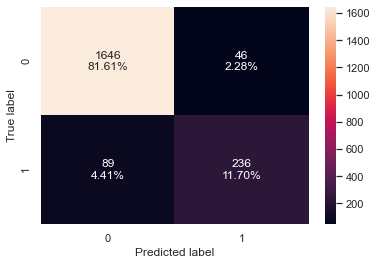

<IPython.core.display.Javascript object>

In [254]:
confusion_matrix_sklearn(rf_tuned2, X_val, y_val)

In [255]:
rf_tuned2_model_train_perf = model_performance_classification_sklearn(
    rf_tuned2, X_train, y_train
)
print("Training performance \n", rf_tuned2_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


<IPython.core.display.Javascript object>

In [256]:
rf_tuned2_model_test_perf = model_performance_classification_sklearn(
    rf_tuned2, X_val, y_val
)
print("Testing performance \n", rf_tuned2_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.933   0.726      0.837 0.778


<IPython.core.display.Javascript object>

#### * Recall score on this model fell from 0.895 for the undersampled data to 0.726 .

#### Hypertuned Adaboost Classifier

In [259]:
%%time

# defining model
model1 = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid1={"n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned = RandomizedSearchCV(estimator=model1, param_distributions=param_grid1, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
abc_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned.best_params_,abc_tuned.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7425641025641025:
Wall time: 30.8 s


<IPython.core.display.Javascript object>

In [261]:
# building model with best parameters
abc_tuned2 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
    random_state=1,
)
# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

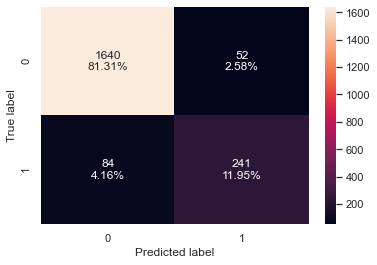

<IPython.core.display.Javascript object>

In [262]:
confusion_matrix_sklearn(abc_tuned2, X_val, y_val)

In [263]:
abc_tuned2_model_train_perf = model_performance_classification_sklearn(
    abc_tuned2, X_train, y_train
)
print("Training performance \n", abc_tuned2_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.972   0.892      0.930 0.911


<IPython.core.display.Javascript object>

In [264]:
abc_tuned2_model_test_perf = model_performance_classification_sklearn(
    abc_tuned2, X_val, y_val
)
print("Testing performance \n", abc_tuned2_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.933   0.742      0.823 0.780


<IPython.core.display.Javascript object>

#### * Recall score on this model fell from 0.892 for the undersampled data to 0.742 .

#### Hypertuned XG Boost Classifier

In [246]:
%%time

# defining model
model2 = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid2={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=model2, param_distributions=param_grid2, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9425641025641026:
Wall time: 25.1 s


<IPython.core.display.Javascript object>

In [247]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=1,
    learning_rate=0.05,
    eval_metric="logloss",
    max_depth=3,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

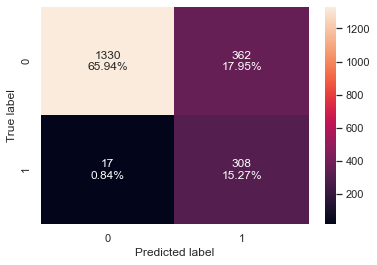

<IPython.core.display.Javascript object>

In [248]:
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

In [249]:
xgb_tuned2_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance \n", xgb_tuned2_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.814   0.957      0.463 0.624


<IPython.core.display.Javascript object>

In [250]:
xgb_tuned2_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned2, X_val, y_val
)
print("Testing performance \n", xgb_tuned2_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.812   0.948      0.460 0.619


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.948 from 0.911 for the undersampled data. But the other Scorers fell drastically.

In [268]:
tuned_models_test_comp_df = pd.concat(
    [
        rf_tuned2_model_test_perf.T,
        abc_tuned2_model_test_perf.T,
        xgb_tuned2_model_test_perf.T,
    ],
    axis=1,
)
tuned_models_test_comp_df.columns = [
    "Tuned Random Forest Classifier",
    "Tuned AdaBoost Classifier",
    "Tuned XGBoost Classifier",
]
print("Testing performance comparison:")
tuned_models_test_comp_df.T

Testing performance comparison:


Accuracy  Recall  Precision    F1
Tuned Random Forest Classifier     0.933   0.726      0.837 0.778
Tuned AdaBoost Classifier          0.933   0.742      0.823 0.780
Tuned XGBoost Classifier           0.812   0.948      0.460 0.619

<IPython.core.display.Javascript object>

#### * The Tuned XGBoost Classifier had the best Recall score of the three tuned models, but the accuracy, precision and F1 scores all fell.

## Hypertuned with Randomized Search CV Undersampled Models

#### Hypertuned Undersampled Random Forest Classifier

In [269]:
%%time

# defining model
model3 = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid3={"n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
rf_un_tuned = RandomizedSearchCV(estimator=model3, param_distributions=param_grid3, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
rf_un_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(rf_un_tuned.best_params_,rf_un_tuned.best_score_))

Best parameters are {'n_estimators': 501, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 'auto'} with CV score=0.9015384615384615:
Wall time: 53.6 s


<IPython.core.display.Javascript object>

In [271]:
# building model with best parameters
rf_un_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=501,
    min_samples_leaf=1,
    max_samples=None,
    max_features="auto",
)
# Fit the model on training data
rf_un_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(n_estimators=501, random_state=1)

<IPython.core.display.Javascript object>

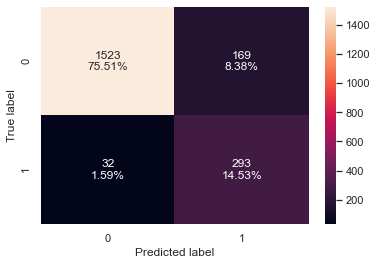

<IPython.core.display.Javascript object>

In [272]:
confusion_matrix_sklearn(rf_un_tuned, X_val, y_val)

In [273]:
rf_un_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_un_tuned, X_train_un, y_train_un
)
print("Training performance \n", rf_un_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


<IPython.core.display.Javascript object>

In [274]:
rf_un_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_un_tuned, X_val, y_val
)
print("Testing performance \n", rf_un_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.900   0.902      0.634 0.745


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 0.902.

#### Hypertuned Undersampled Adaboost Classifier

In [275]:
%%time

# defining model
model4 = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid4={"n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_un_tuned = RandomizedSearchCV(estimator=model4, param_distributions=param_grid4, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
abc_un_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(abc_un_tuned.best_params_,abc_un_tuned.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8933333333333333:
Wall time: 13.8 s


<IPython.core.display.Javascript object>

In [277]:
# building model with best parameters
abc_un_tuned = AdaBoostClassifier(
    n_estimators=30,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
    random_state=1,
)
# Fit the model on training data
abc_un_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

<IPython.core.display.Javascript object>

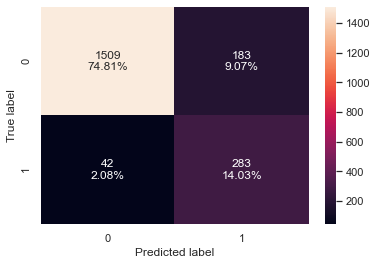

<IPython.core.display.Javascript object>

In [278]:
confusion_matrix_sklearn(abc_un_tuned, X_val, y_val)

In [279]:
abc_un_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_un_tuned, X_train_un, y_train_un
)
print("Training performance \n", abc_un_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.932   0.928      0.935 0.932


<IPython.core.display.Javascript object>

In [280]:
abc_un_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_un_tuned, X_val, y_val
)
print("Testing performance \n", abc_un_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.888   0.871      0.607 0.716


<IPython.core.display.Javascript object>

#### * Recall score on this model fell to 0.871

#### Hypertuned Undersampled XG Boost Classifier

In [281]:
%%time

# defining model
model4 = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid4={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_un_tuned = RandomizedSearchCV(estimator=model4, param_distributions=param_grid4, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_un_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xgb_un_tuned.best_params_,xgb_un_tuned.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 1} with CV score=1.0:
Wall time: 12.6 s


<IPython.core.display.Javascript object>

In [282]:
# building model with best parameters
xgb_un_tuned = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=0.9,
    learning_rate=0.01,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=5,
)
# Fit the model on training data
xgb_un_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

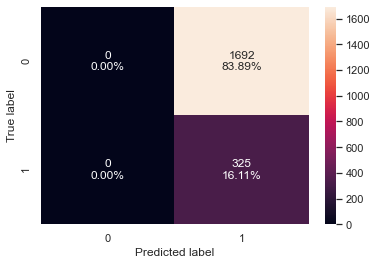

<IPython.core.display.Javascript object>

In [283]:
confusion_matrix_sklearn(xgb_un_tuned, X_val, y_val)

In [284]:
xgb_un_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_un_tuned, X_train_un, y_train_un
)
print("Training performance \n", xgb_un_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667


<IPython.core.display.Javascript object>

In [285]:
xgb_un_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_un_tuned, X_val, y_val
)
print("Testing performance \n", xgb_un_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.161   1.000      0.161 0.278


<IPython.core.display.Javascript object>

#### * Recall score on this model rose to 1.000. But, the other Scorers fell drastically.

In [286]:
tuned_un_models_test_comp_df = pd.concat(
    [
        rf_un_tuned_model_test_perf.T,
        abc_un_tuned_model_test_perf.T,
        xgb_un_tuned_model_test_perf.T,
    ],
    axis=1,
)
tuned_un_models_test_comp_df.columns = [
    "Tuned Undersampled Random Forest Classifier",
    "Tuned Undersampled AdaBoost Classifier",
    "Tuned Undersampled XGBoost Classifier",
]
print("Testing performance comparison:")
tuned_un_models_test_comp_df.T

Testing performance comparison:


Accuracy  Recall  Precision    F1
Tuned Undersampled Random Forest Classifier     0.900   0.902      0.634 0.745
Tuned Undersampled AdaBoost Classifier          0.888   0.871      0.607 0.716
Tuned Undersampled XGBoost Classifier           0.161   1.000      0.161 0.278

<IPython.core.display.Javascript object>

#### * The Tuned XGBoost Classifier had the best Recall score of the three tuned models, but the accuracy, precision and F1 scores all fell again.

## Looking at all 24 models to determine the best.

In [287]:
all_models2_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        bag_model_test_perf.T,
        rf_model_test_perf.T,
        abc_model_test_perf.T,
        gbc_model_test_perf.T,
        xgb_model_test_perf.T,
        dtree_over_model_test_perf.T,
        bag_over_model_test_perf.T,
        rf_over_model_test_perf.T,
        abc_over_model_test_perf.T,
        gbc_over_model_test_perf.T,
        xgb_over_model_test_perf.T,
        dtree_un_model_test_perf.T,
        bag_un_model_test_perf.T,
        rf_un_model_test_perf.T,
        abc_un_model_test_perf.T,
        gbc_un_model_test_perf.T,
        xgb_un_model_test_perf.T,
        rf_tuned2_model_test_perf.T,
        abc_tuned2_model_test_perf.T,
        xgb_tuned2_model_test_perf.T,
        rf_un_tuned_model_test_perf.T,
        abc_un_tuned_model_test_perf.T,
        xgb_un_tuned_model_test_perf.T,
    ],
    axis=1,
)
all_models2_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "AdaBoost Classifier",
    "Gradient Boost Classifier",
    "XGBoost Classifier",
    "Oversampled Decision Tree",
    "Oversampled Bagging Classifier",
    "Oversampled Random Forest Classifier",
    "Oversampled AdaBoost Classifier",
    "Oversampled Gradient Boost Classifier",
    "Oversampled XGBoost Classifier",
    "Undersampled Decision Tree",
    "Undersampled Bagging Classifier",
    "Undersampled Random Forest Classifier",
    "Undersampled AdaBoost Classifier",
    "Undersampled Gradient Boost Classifier",
    "Undersampled XGBoost Classifier",
    "Tuned Random Forest Classifier",
    "Tuned AdaBoost Classifier",
    "Tuned XGBoost Classifier",
    "Tuned Undersampled Random Forest Classifier",
    "Tuned Undersampled AdaBoost Classifier",
    "Tuned Undersampled XGBoost Classifier",
]
print("Testing performance comparison:")
all_models2_test_comp_df.T

Testing performance comparison:


Accuracy  Recall  Precision    F1
Decision Tree                                   0.893   0.658      0.673 0.666
Bagging Classifier                              0.923   0.652      0.831 0.731
Random Forest Classifier                        0.926   0.658      0.849 0.742
AdaBoost Classifier                             0.929   0.735      0.805 0.768
Gradient Boost Classifier                       0.930   0.708      0.833 0.765
XGBoost Classifier                              0.940   0.751      0.856 0.800
Oversampled Decision Tree                       0.886   0.692      0.634 0.662
Oversampled Bagging Classifier                  0.920   0.711      0.773 0.740
Oversampled Random Forest Classifier            0.926   0.698      0.817 0.753
Oversampled AdaBoost Classifier                 0.912   0.760      0.714 0.736
Oversampled Gradient Boost Classifier           0.936   0.754      0.831 0.790
Oversampled XGBoost Classifier                  0.941   0.769      0.847 0.806
Undersampled Decision Tree                      0.846   0.834      0.513 0.635
Undersampled Bagging Classifier                 0.895   0.871      0.626 0.728
Undersampled Random Forest Classifier           0.903   0.895      0.644 0.749
Undersampled AdaBoost Classifier                0.877   0.892      0.577 0.700
Undersampled Gradient Boost Classifier          0.909   0.880      0.664 0.757
Undersampled XGBoost Classifier                 0.907   0.911      0.651 0.759
Tuned Random Forest Classifier                  0.933   0.726      0.837 0.778
Tuned AdaBoost Classifier                       0.933   0.742      0.823 0.780
Tuned XGBoost Classifier                        0.812   0.948      0.460 0.619
Tuned Undersampled Random Forest Classifier     0.900   0.902      0.634 0.745
Tuned Undersampled AdaBoost Classifier          0.888   0.871      0.607 0.716
Tuned Undersampled XGBoost Classifier           0.161   1.000      0.161 0.278

<IPython.core.display.Javascript object>

## Of all the models tested the Undersampled XGBoost Classifier had the highest Recall (0.911) with the validation set without the other metrics suffering. 

 #### Running the selected model against the test set

In [288]:
xgb_un_model_final_perf = model_performance_classification_sklearn(
    xgb_un, X_test, y_test
)
print("Final testing performance \n", xgb_un_model_final_perf)

Final testing performance 
    Accuracy  Recall  Precision    F1
0     0.896   0.880      0.626 0.731


<IPython.core.display.Javascript object>

In [294]:
print(
    pd.DataFrame(
        xgb_un.feature_importances_, columns=["Imp"], index=X.columns
    ).sort_values(by="Imp", ascending=False)
)

                                Imp
Total_Revolving_Bal           0.149
Total_Trans_Ct                0.145
Total_Relationship_Count      0.099
Months_Inactive_12_mon        0.053
Gender_Male                   0.045
Credit_Limit                  0.043
Contacts_Count_12_mon         0.034
Card_Category_Gold            0.033
Total_Ct_Chng_Q4_Q1           0.032
Total_Amt_Chng_Q4_Q1          0.032
Education_Level_Graduate      0.031
Months_on_book                0.030
Dependent_count               0.030
Avg_Utilization_Ratio         0.027
Customer_Age                  0.025
Education_Level_Post-Graduate 0.023
Income_Category_$40K - $60K   0.023
Income_Category_$80K - $120K  0.021
Income_Category_$60K - $80K   0.019
Education_Level_High School   0.018
Marital_Status_Married        0.016
Education_Level_College       0.015
Education_Level_Unknown       0.015
Marital_Status_Divorced       0.014
Card_Category_Silver          0.013
Marital_Status_Unknown        0.011
Income_Category_$120K +     

<IPython.core.display.Javascript object>

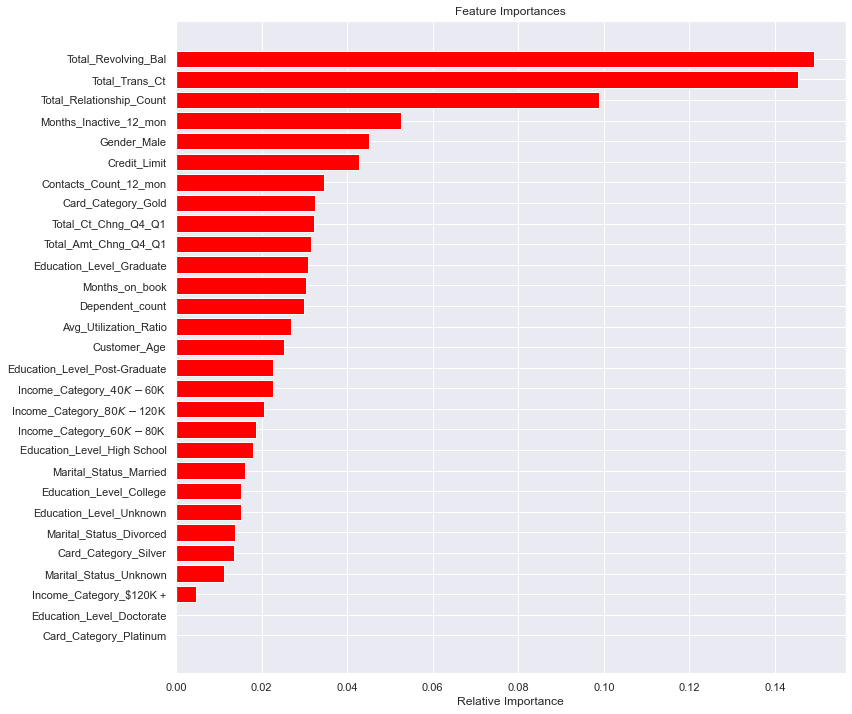

<IPython.core.display.Javascript object>

In [295]:
feature_names = X.columns
importances = xgb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### * The Recall against the test set fell slightly to 0.880, I still think this generalizes well. 
#### * The top 3 most important features in this model are Total Revolving Balance, Total Transation Count, and Total Relationship Count.

# 7. Production Pipeline

## Production pipeline will account for NaN data in future rows. The numerical columns and categorical columns will be dealt with separately.

In [ ]:
# creating a list of numerical variables
numerical_features = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal'
    'Avg_Open_To_Buy '
    'Total_Amt_Chng_Q4_Q1'
    'Total_Trans_Amt '
    'Total_Trans_Ct'
    'Total_Ct_Chng_Q4_Q1'
    'Avg_Utilization_Ratio'
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables, not used in my model but for future use.
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' ]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

In [ ]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")
Y = data1["Attrition_flag"]

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

In [ ]:
# Creating new pipeline with best parameters
plmodel = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("rus", RandomUnderSampler(random_state=1) )
        ("xgb_un" , XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),]
)
# Fit the model on training data
plmodel.fit(X_train, y_train)

In [ ]:
# transforming and predicting on test data
plmodel.predict(X_test)

# 8. Business Insights

- The model selected from the 24 tested was the Undersampled XGBoost Classifier. This model had one of the highest Recall scores (0.911) along with high Accuracy, Precision, and F1 scores. The model was able to generalize well and worked well with the test data (Recall= 0.88). While I got higher Recall scores on other models the other testing metrics dropped considerably on those models. 
- As mentioned, the average Thera Bank customer is a 46 year old married woman with a college degree, makes less then 40k a year, and holds the Blue Card. They have been with the company for ~3 years, having 4 relationships with Thera Bank, have been contacted twice in the past year, and have only been inactive for 2 months in the last year. Their Blue card has an average line of credit 4549 dollars, which is utilized around 17-27%. They have used their card an average of 65 times spending around 4k.
- Female customers tend to have lower credit limits and higher utilization rates then males while keeping their revolving balance at the same levels. Focus could be made toward extending lines of business and credit limits to our female customers.
- Customers that have more kids, doctorate degrees, high incomes, and are platinum members tend to attrite at higher rates. Perhaps incentives for the higher status cards (Silver, Gold, Platnum) could be expanded to keep the customers that may not need the credit card from giving it up.
- Making incentives for highly educated individuals (perhaps cash back on loan repayments) could help keep those customers who were using the credit cards to get through their degree work.
- Extending credit limits to higher earning individuals may keep them from attriting.